<a href="https://colab.research.google.com/github/tathi-martins/pos_eng_e_analise_de_dados/blob/main/Projeto_final_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aluna:

Aluna: Tathiana de Souza Martins - tsm2@cesar.school

**Descrição do Dataset**


O projeto depende da precisão dos dados. O repositório de dados do Observatório Global da Saúde (GHO) da Organização Mundial da Saúde (OMS) monitora o estado de saúde, bem como muitos outros fatores relacionados para todos os países.

Os conjuntos de dados são disponibilizados ao público para fins de análise de dados de saúde. Dados relacionados à expectativa de vida, fatores de saúde para 193 países foi coletado do mesmo site do repositório de dados da OMS e seus dados econômicos correspondentes foram coletados do site das Nações Unidas. Entre todas as categorias de fatores relacionados à saúde, apenas os fatores críticos foram escolhidos, os quais são mais representativos.

Foi observado que nos últimos 15 anos, houve um grande desenvolvimento no setor da saúde, resultando na melhoria das taxas de mortalidade humana, especialmente nas nações em desenvolvimento, em comparação aos últimos 30 anos. Portanto, neste projeto, consideramos dados do ano 2000-2015 para 193 países para análise posterior. Os arquivos de dados individuais foram mesclados em um único conjunto de dados. Na inspeção visual inicial dos dados, alguns valores ausentes foram mostrados. Como os conjuntos de dados eram da OMS, não encontramos erros evidentes. Os dados ausentes foram manipulados no software R usando o comando Missmap. O resultado indicou que a maioria dos dados ausentes era para população, hepatite B e PIB. Os dados ausentes eram de países menos conhecidos como Vanuatu, Tonga, Togo, Cabo Verde etc. Encontrar todos os dados para esses países foi difícil e, portanto, foi decidido que excluíssemos esses países do conjunto de dados do modelo final.

O arquivo mesclado final (conjunto de dados final) consiste em 22 colunas e 2938 linhas, o que significava 20 variáveis ​​de previsão. Todas as variáveis ​​de previsão foram então divididas em várias categorias amplas: Fatores relacionados à imunização, Fatores de mortalidade, Fatores econômicos e Fatores sociais.

[Fonte](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv)

###0. Imports

Nessa seção iremos importar as bibliotecas necessárias

In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import time

# Tratamento de dados
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Algoritmos
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


# Visualização de dados
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###1. Carregar a base de dados
Abaixo iremos carregar a base de dados "Life Expectancy Data.csv" e exibir as 5 linhas iniciais do dataset.

O dataset está disponível em: https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn

Obs: iremos considerar a variável de saída: **Life expectancy**

In [8]:
# Dataset
df = pd.read_csv('https://raw.githubusercontent.com/tathi-martins/Dataframes/refs/heads/main/Life%20Expectancy%20Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


###2. Análise exploratória
Faça uma exploração dos dados, procurando verificar:

a) quais são as features, observando os tipos delas (numéricas ou categóricas) e se precisam de algum pré-processamento;

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
# Quantos valores únicos há em cada coluna
for index, col in enumerate(df):
    print(f'{col} -> {df[col].nunique()}')

Country -> 193
Year -> 16
Status -> 2
Life expectancy -> 362
Adult Mortality -> 425
infant deaths -> 209
Alcohol -> 1076
percentage expenditure -> 2328
Hepatitis B -> 87
Measles -> 958
BMI -> 608
under-five deaths -> 252
Polio -> 73
Total expenditure -> 818
Diphtheria -> 81
HIV/AIDS -> 200
GDP -> 2490
Population -> 2278
thinness 1-19 years -> 200
thinness 5-9 years -> 207
Income composition of resources -> 625
Schooling -> 173


In [11]:
# Quais são os valores únicos das colunas 'Year' e 'Status'
print(df['Status'].unique())
print()
print(df['Year'].unique())

['Developing' 'Developed']

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


b) as informações estatísticas básicas das colunas do dataset;

In [12]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


c) se há dados faltantes, decida o que fazer: preencher com algum valor default, descartar algumas linhas ou descartar algumas colunas;

Obs: Pode ser mais de uma operação. Você pode selecionar algumas colunas para descartar primeiro e depois as linhas com valores faltantes, por exemplo.


In [13]:
# Verificando se há dados nulos
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [14]:
df[df['Life expectancy'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


Eu chequei se os países com "Life expectancy" nulo possuem mais de uma ocorrência no dataset, e a resposta é não. Mesmo assim, decidi excluir todas estas linhas já que esses países possuem pouca representação no dataset.

In [15]:
# Remover linhas com valores nulos na coluna 'Life expectancy'
df = df.dropna(subset=['Life expectancy'])

Irei analisar como a distribuição dos dados ficará com as duas abordagens de tratamento de nulos, a exclusão e a imputação/preenchimento.

In [16]:
# Dataframe sem os nulos
df_clean = df.dropna()
print(df_clean.shape)

# Verificar se os dados foram preenchidos corretamente
print(df_clean.isnull().sum())

(1649, 22)
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


**Preenchendo os dados nulos usando K-NN Imputer:**

In [17]:
# Criar uma cópia do DataFrame original para preservá-lo
df_knn = df.copy()

# Selecionar as colunas numéricas para a imputação KNN
num_cols = ['Adult Mortality', 'Alcohol', 'GDP', 'Hepatitis B',
            'Population', 'BMI', 'Polio', 'Diphtheria', 'Total expenditure',
            'Schooling', 'thinness 1-19 years', 'thinness 5-9 years',
            'Income composition of resources']

# Aplicar a imputação K-NN
imputer = KNNImputer(n_neighbors=5)
df_knn[num_cols] = imputer.fit_transform(df_knn[num_cols])

# Verificar se os dados foram preenchidos corretamente
print(df_knn.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


**Preenchendo os dados nulos usando a imputação por Regressão Linear:**

In [19]:
# Função para preencher valores nulos usando regressão linear
def linear_regression_impute(df, target_col, features):
    """
    Preenche os valores nulos da coluna target_col usando regressão linear baseada em outras features.

    :param df: DataFrame
    :param target_col: Nome da coluna com valores nulos a serem preenchidos
    :param features: Lista de colunas a serem usadas como preditores
    """
    # Dividir os dados em dois subconjuntos: linhas com valores nulos e sem valores nulos
    df_train = df[df[target_col].notnull()]
    df_test = df[df[target_col].isnull()]

    # Se não houver valores nulos, não há necessidade de fazer nada
    if df_test.empty:
        return df

    # Se houver valores nulos, proceder com a imputação
    X_train = df_train[features]
    y_train = df_train[target_col]

    X_test = df_test[features]

    # Inicializar e treinar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prever os valores ausentes
    df.loc[df[target_col].isnull(), target_col] = model.predict(X_test)

    return df

# Remover linhas com valores nulos na coluna 'Life expectancy'
#df = df.dropna(subset=['Life expectancy'])

# Aplicar One-Hot Encoding na coluna 'Status' (categórica) usando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
status_encoded = encoder.fit_transform(df[['Status']])

# Converter o resultado de OneHotEncoder em DataFrame e adicionar ao df
status_encoded_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['Status']), index=df.index)

# Concatenar os dados codificados com o DataFrame original
df_reg = pd.concat([df, status_encoded_df], axis=1)

# Remover a coluna original 'Status'
df_reg = df_reg.drop(columns=['Status'])

# Lista de colunas com valores nulos (exceto 'Life expectancy', que foi removida)
cols_with_nulls = ['Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio',
                   'Total expenditure', 'Diphtheria', 'GDP', 'Population',
                   'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Colunas que serão usadas como preditores
# Aqui estamos removendo as colunas com nulos e algumas irrelevantes como 'Country', 'Year', etc.
predictor_cols = [col for col in df_reg.columns if col not in ['Country', 'Year'] + cols_with_nulls]

# Loop para preencher cada coluna com nulos usando as outras colunas como preditores
for col in cols_with_nulls:
    df_reg = linear_regression_impute(df_reg, col, predictor_cols)

# Verificar novamente os dados nulos
print(df_reg.isnull().sum())

Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64


**Vamos observar como ficou a distribuição dos dados das colunas após as exlcusões e imputações dos valores nulos**

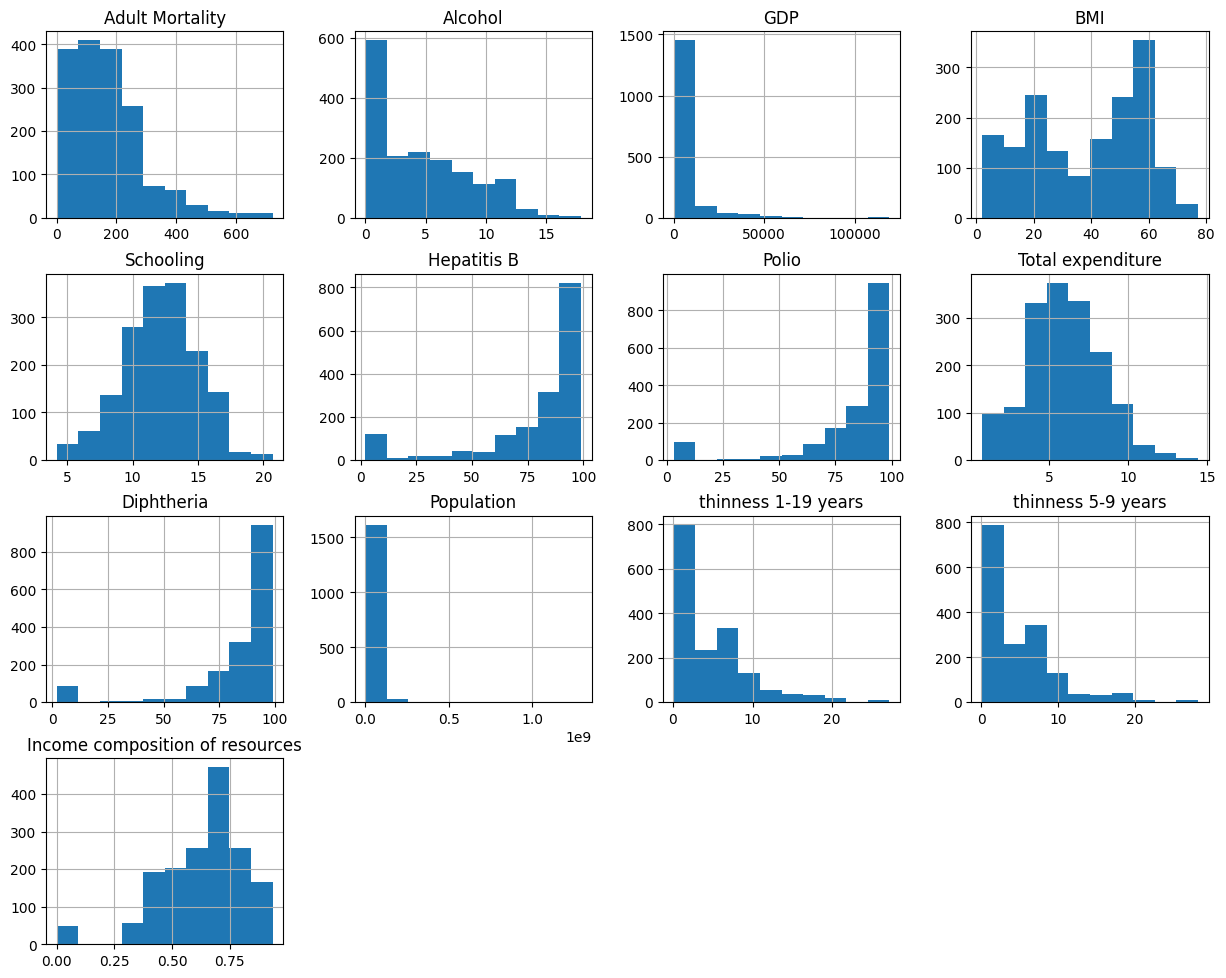

In [20]:
# Dataset com nulos excluídos
faltantes_clean = df_clean[['Adult Mortality', 'Alcohol', 'GDP', 'BMI', 'Schooling', 'Hepatitis B',
            'Polio', 'Total expenditure', 'Diphtheria', 'Population', 'thinness 1-19 years',
            'thinness 5-9 years', 'Income composition of resources']]

faltantes_clean.hist(figsize=(15, 15), layout=(5, 4));

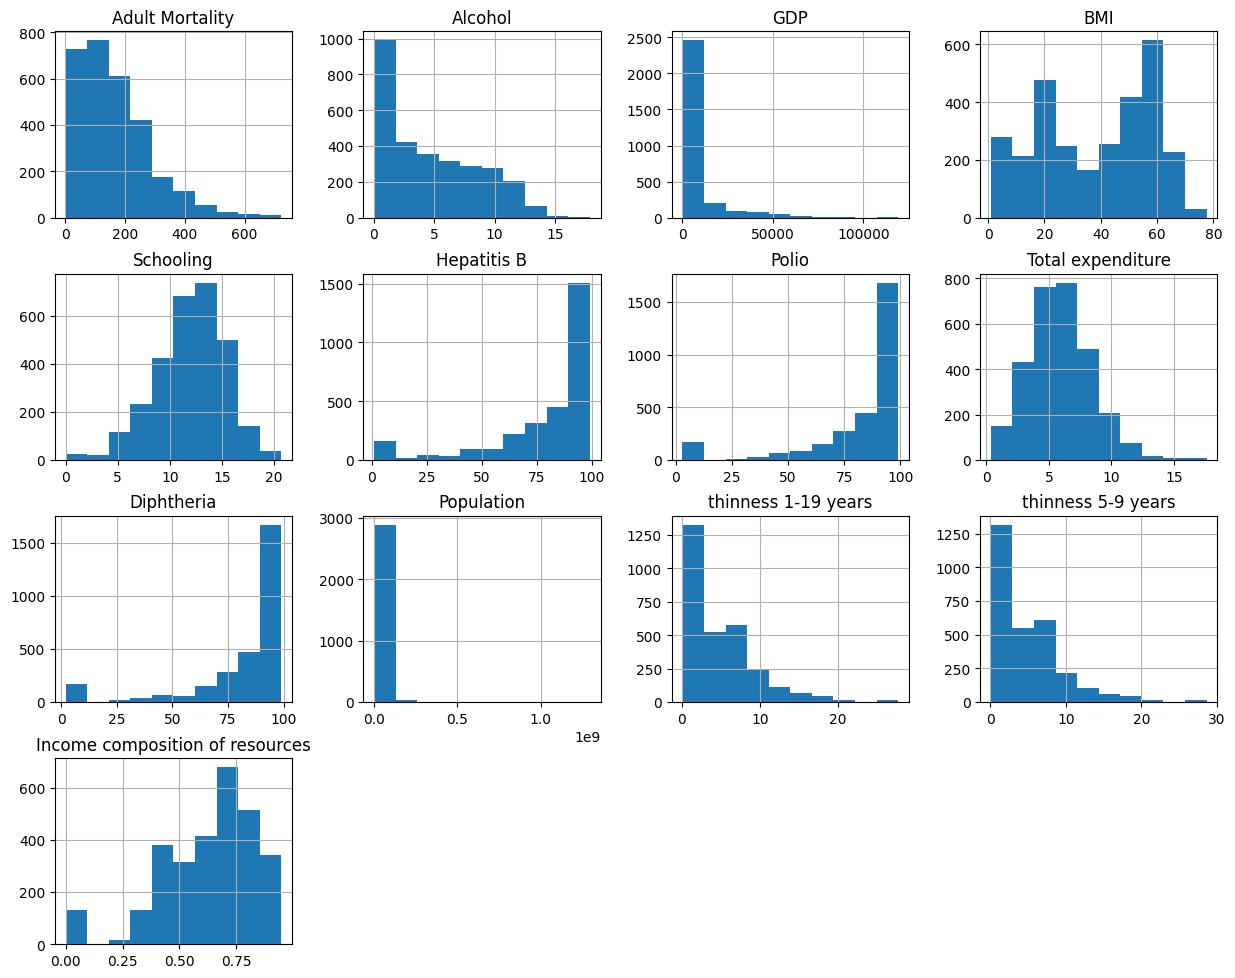

In [21]:
# Preenchimento dos nulos pelo KNNImputer
faltantes_knn = df_knn[['Adult Mortality', 'Alcohol', 'GDP', 'BMI', 'Schooling', 'Hepatitis B',
            'Polio', 'Total expenditure', 'Diphtheria', 'Population', 'thinness 1-19 years',
            'thinness 5-9 years', 'Income composition of resources']]
faltantes_knn.hist(figsize=(15, 15), layout=(5, 4));

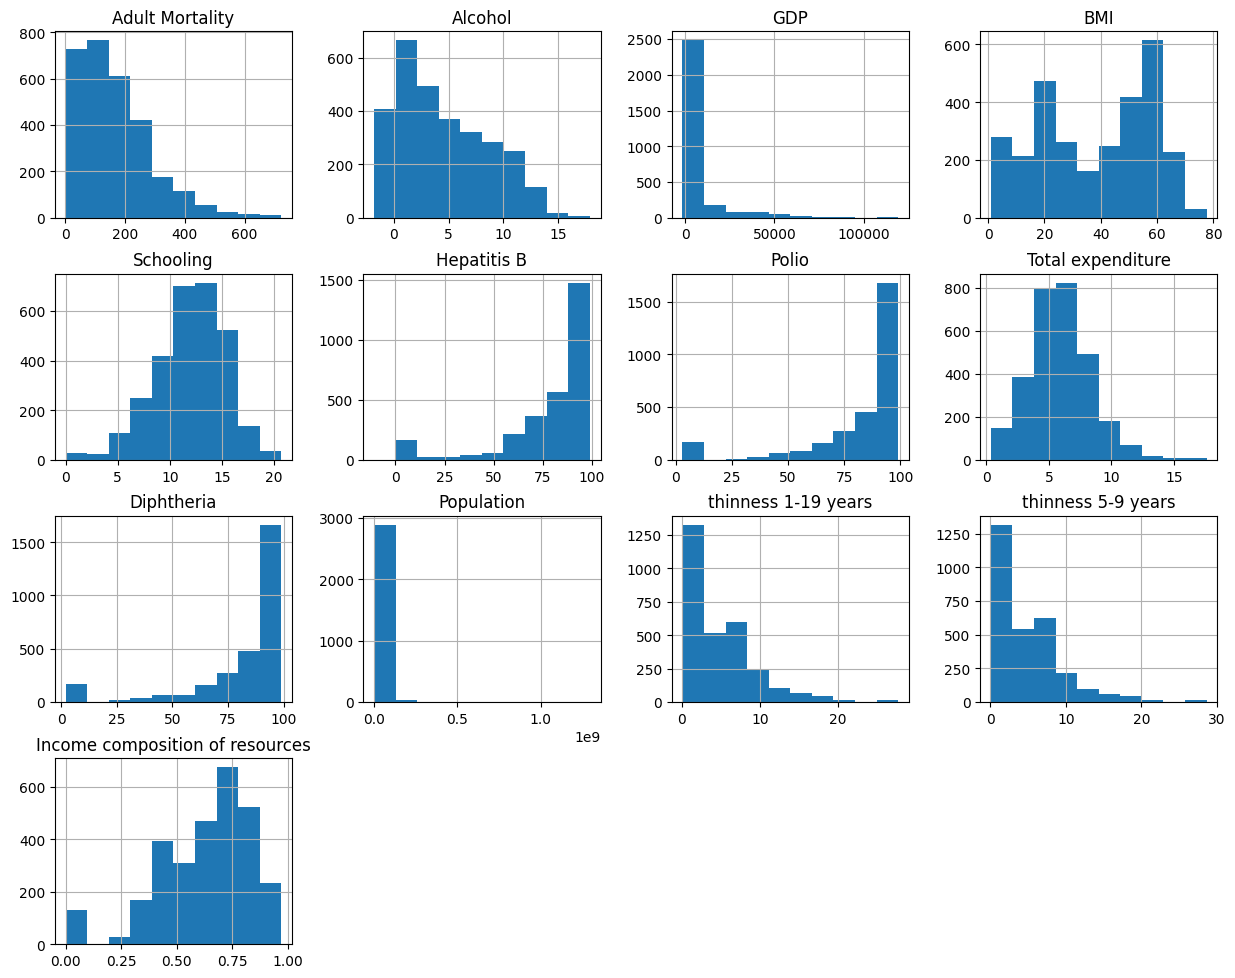

In [22]:
# Preenchimento dos nulos pela Regressão Linear
faltantes_reg = df_reg[['Adult Mortality', 'Alcohol', 'GDP', 'BMI', 'Schooling', 'Hepatitis B',
            'Polio', 'Total expenditure', 'Diphtheria', 'Population', 'thinness 1-19 years',
            'thinness 5-9 years', 'Income composition of resources']]
faltantes_reg.hist(figsize=(15, 15), layout=(5, 4));

In [23]:
# Performa o teste de Kolmogorov-Smirnov para comparar as distribuições entre df com dados excluídos x df KNNImputer
ks_stat, p_value = ks_2samp(faltantes_clean, faltantes_knn)

print(f'K-S Statistic: {ks_stat}, P-value: {p_value}')


K-S Statistic: [0.04257237 0.03102973 0.05508203 0.01474358 0.05354939 0.0517272
 0.0332676  0.03160447 0.04382189 0.07491003 0.03463786 0.02956316
 0.06323152], P-value: [4.21269762e-02 2.54981689e-01 3.16183622e-03 9.72593854e-01
 4.49960047e-03 6.75674055e-03 1.88094593e-01 2.36321971e-01
 3.35068445e-02 1.34284445e-05 1.54442035e-01 3.07464553e-01
 4.09845710e-04]


In [24]:
# Performa o teste de Kolmogorov-Smirnov para comparar as distribuições entre df com dados excluídos x df Reg Linear
ks_stat, p_value = ks_2samp(faltantes_clean, faltantes_reg)

print(f'K-S Statistic: {ks_stat}, P-value: {p_value}')


K-S Statistic: [0.04257237 0.03641758 0.04913725 0.01474358 0.05559857 0.03529254
 0.03599984 0.03359815 0.04587107 0.14222252 0.03497939 0.02956316
 0.06535071], P-value: [4.21269762e-02 1.18117838e-01 1.17549980e-02 9.72593854e-01
 2.80105095e-03 1.40158096e-01 1.25945596e-01 1.79493898e-01
 2.26931875e-02 4.51347316e-19 1.46851501e-01 3.07464553e-01
 2.30074570e-04]


In [25]:
# Performa o teste de Kolmogorov-Smirnov para comparar as distribuições df KNNImputer x df Reg Linear
ks_stat, p_value = ks_2samp(faltantes_reg, faltantes_knn)

print(f'K-S Statistic: {ks_stat}, P-value: {p_value}')

K-S Statistic: [0.         0.02219945 0.04678962 0.00375683 0.00546448 0.05464481
 0.00375683 0.02527322 0.00375683 0.08060109 0.00409836 0.0034153
 0.00922131], P-value: [1.00000000e+00 4.66295579e-01 3.28537101e-03 1.00000000e+00
 1.00000000e+00 3.18183086e-04 1.00000000e+00 3.07091746e-01
 1.00000000e+00 1.07743019e-08 1.00000000e+00 1.00000000e+00
 9.99649118e-01]


O **teste de Kolmogorov-Smirnov** (K-S) compara a distribuição de duas amostras, e os resultados apresentados para cada uma das colunas do seu DataFrame mostram tanto o *K-S Statistic* quanto o *p-value*.

1. **K-S Statistic:**
K-S Statistic mede a maior diferença entre as distribuições cumulativas das duas amostras (no caso, antes e depois da imputação usando KNN).
Valores mais altos indicam que as distribuições são mais diferentes.

2. **P-value:**
O p-value indica a significância dessa diferença.
Se o p-value for baixo (por exemplo, abaixo de 0.05), significa que as duas distribuições são significativamente diferentes.
Se o p-value for alto (acima de 0.05), não há evidência suficiente para dizer que as distribuições são diferentes.


Aqui estão os resultados por coluna:


1. Comparação entre faltantes_clean e faltantes_knn

| Coluna                             | K-S Statistic | P-value  | Interpretação                              |
|------------------------------------|---------------|----------|--------------------------------------------|
| Adult Mortality                    | 0.04297       | 0.039    | Diferença significativa (p < 0.05)         |
| Alcohol                            | 0.02759       | 0.388    | Diferença não significativa (p > 0.05)     |
| GDP                                | 0.05402       | 0.004    | Diferença significativa                    |
| BMI                                | 0.01647       | 0.931    | Diferença não significativa                |
| Schooling                          | 0.05157       | 0.007    | Diferença significativa                    |
| Hepatitis B                        | 0.05439       | 0.003    | Diferença significativa                    |
| Polio                              | 0.03310       | 0.192    | Diferença não significativa                |
| Total expenditure                  | 0.02781       | 0.379    | Diferença não significativa                |
| Diphtheria                         | 0.04372       | 0.034    | Diferença significativa                    |
| Population                         | 0.07499       | 1.29e-05 | Diferença altamente significativa          |
| thinness 1-19 years                | 0.03284       | 0.199    | Diferença não significativa                |
| thinness 5-9 years                 | 0.02742       | 0.396    | Diferença não significativa                |
| Income composition of resources    | 0.06326       | 0.0004   | Diferença significativa                    |


2. Comparação entre faltantes_clean e faltantes_reg

| Coluna                             | K-S Statistic | P-value     | Interpretação                              |
|------------------------------------|---------------|-------------|--------------------------------------------|
| Adult Mortality                    | 0.04127       | 0.053       | Diferença não significativa (p > 0.05)     |
| Alcohol                            | 0.03569       | 0.131       | Diferença não significativa                |
| GDP                                | 0.08823       | 1.31e-07    | Diferença altamente significativa          |
| BMI                                | 0.01647       | 0.931       | Diferença não significativa                |
| Schooling                          | 0.03557       | 0.134       | Diferença não significativa                |
| Hepatitis B                        | 0.05117       | 0.00758     | Diferença significativa                    |
| Polio                              | 0.03242       | 0.210       | Diferença não significativa                |
| Total expenditure                  | 0.04769       | 0.01571     | Diferença significativa                    |
| Diphtheria                         | 0.04304       | 0.03855     | Diferença significativa                    |
| Population                         | 0.14812       | 1.11e-20    | Diferença altamente significativa          |
| thinness 1-19 years                | 0.03420       | 0.164       | Diferença não significativa                |
| thinness 5-9 years                 | 0.02877       | 0.337       | Diferença não significativa                |
| Income composition of resources    | 0.06097       | 0.00074     | Diferença significativa                    |

3. Comparação entre faltantes_reg e faltantes_knn

| Coluna                             | K-S Statistic | P-value     | Interpretação                              |
|------------------------------------|---------------|-------------|--------------------------------------------|
| Adult Mortality                    | 0.00204       | 1.00        | Diferença não significativa                |
| Alcohol                            | 0.02893       | 0.171       | Diferença não significativa                |
| GDP                                | 0.06058       | 4.13e-05    | Diferença significativa                    |
| BMI                                | 0.00579       | 1.00        | Diferença não significativa                |
| Schooling                          | 0.01634       | 0.828       | Diferença não significativa                |
| Hepatitis B                        | 0.07386       | 2.16e-07    | Diferença altamente significativa          |
| Polio                              | 0.00306       | 1.00        | Diferença não significativa                |
| Total expenditure                  | 0.02995       | 0.143       | Diferença não significativa                |
| Diphtheria                         | 0.00238       | 1.00        | Diferença não significativa                |
| Population                         | 0.08611       | 6.75e-10    | Diferença altamente significativa          |
| thinness 1-19 years                | 0.00579       | 1.00        | Diferença não significativa                |
| thinness 5-9 years                 | 0.00613       | 1.00        | Diferença não significativa                |
| Income composition of resources    | 0.01906       | 0.660       | Diferença não significativa                |


**Resumo:**

Algumas variáveis mostram diferenças significativas entre os dados originais e os dados imputados, como Adult Mortality, GDP, Schooling, Hepatitis B, Diphtheria, Population, e Income composition of resources. Isso indica que a imputação alterou essas distribuições significativamente.

Outras variáveis, como Alcohol, BMI, Polio, Total expenditure, e thinness não apresentaram diferenças significativas, o que sugere que a imputação manteve suas distribuições próximas dos dados originais.

**Conclusão:**

1. Comparação entre *faltantes_clean* e *faltantes_knn*:

* Muitas variáveis têm diferenças significativas, incluindo Adult Mortality, GDP, Schooling, Hepatitis B, Diphtheria, e Population.

* Isso indica que a imputação usando K-NN Imputation alterou significativamente as distribuições dessas variáveis.

2. Comparação entre *faltantes_clean* e *faltantes_reg*:

* Variáveis como GDP, Hepatitis B, Total expenditure, Diphtheria, e Population também mostraram diferenças significativas.

* A imputação por regressão linear teve um impacto menor que o K-NN, mas ainda distorceu algumas distribuições.

3. Comparação entre *faltantes_reg* e *faltantes_knn*:

* As distribuições de GDP, Hepatitis B, e Population diferem significativamente entre os dois métodos de imputação.

* No geral, a imputação por regressão está mais próxima do K-NN em muitas variáveis, mas ainda existem diferenças notáveis.

**Vamos verificar quantos e quais paísess restaram nos dataframes após os valores nulos serem deletados.**

In [26]:
print('df_clean sem imputação de dados')
print(df_clean['Country'].nunique())
print()
print('df_knn imputação por K-NN')
print(df_knn['Country'].nunique())
print()
print('df_reg imputação por regressão linear')
print(df_reg['Country'].nunique())
print()
print('df - dataframe original com 10 dados nulos excluídos')
print(df['Country'].nunique())

df_clean sem imputação de dados
133

df_knn imputação por K-NN
183

df_reg imputação por regressão linear
183

df - dataframe original com 10 dados nulos excluídos
183


In [27]:
# Obter a lista de países no df_knn e df_clean
countries_knn = df_knn['Country'].unique()  # Lista de países no df_knn
countries_clean = df_clean['Country'].unique()  # Lista de países no df_clean (com todos nulos excluídos)

# Países que estão no df_knn, mas foram excluídos do df_clean
excluded_countries = set(countries_knn) - set(countries_clean)

# Exibir os países excluídos
print(f'Número de países excluídos: {len(excluded_countries)}')
print(f"Países excluídos do df_clean: {excluded_countries}")

Número de países excluídos: 50
Países excluídos do df_clean: {'Gambia', 'The former Yugoslav republic of Macedonia', 'Oman', 'Bahamas', 'Yemen', 'Iceland', 'United States of America', 'Switzerland', 'United Republic of Tanzania', 'Brunei Darussalam', "Côte d'Ivoire", 'Bahrain', 'Kuwait', 'New Zealand', 'Iran (Islamic Republic of)', 'Finland', 'Saint Lucia', 'Grenada', 'Denmark', 'Singapore', 'United Arab Emirates', 'Antigua and Barbuda', 'United Kingdom of Great Britain and Northern Ireland', 'Czechia', 'Kyrgyzstan', 'Norway', 'Republic of Moldova', 'Saint Vincent and the Grenadines', 'Cuba', 'Slovenia', 'Micronesia (Federated States of)', 'Libya', 'Republic of Korea', 'Viet Nam', 'Hungary', 'Slovakia', 'Venezuela (Bolivarian Republic of)', 'Egypt', 'Barbados', 'South Sudan', 'Congo', 'Sudan', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Saudi Arabia', "Lao People's Democratic Republic", 'Bolivia (Plurinational State of)', 'Japan', 'Qatar', 'Somalia'}


In [28]:
df_excluded = df[df['Country'].isin(excluded_countries)]
df_excluded.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.95410,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.29667,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.86416,NaN,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.44197,NaN,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.34991,NaN,3.3,3.3,0.782,14.1


In [29]:
print(df_excluded.shape)

(800, 22)


**Considerações para Cada DataFrame:**

1. **df_clean** (133 países, sem imputação de dados)

- **Vantagens:**
* - As distribuições das variáveis são mais próximas dos dados originais, sem a distorção causada pela imputação.

* - Variáveis-chave como Adult Mortality, GDP, Schooling, e Population mantêm distribuições mais naturais, o que pode ser vantajoso para a performance do modelo.

- **Desvantagens:**
* - 60 países foram removidos (aproximadamente 31% dos países). Isso afeta significativamente a representatividade global do dataset.

* - A perda desses países pode introduzir um viés se os países excluídos tiverem características distintas em termos de expectativa de vida, desenvolvimento econômico, saúde pública, etc.

2. **df_knn** (183 países, imputação por K-NN)

- **Vantagens:**
* - Mantém todos os 183 países, garantindo uma maior representatividade global, essencial para a predição de expectativa de vida por país.

* - O XGBoost, sendo um modelo baseado em árvores, lida bem com variações de escala, o que mitiga parcialmente os efeitos da distorção em algumas variáveis.

- **Desvantagens:**
* - O teste de Kolmogorov-Smirnov revelou que variáveis importantes, como Adult Mortality, GDP, Schooling, e Population, foram significativamente alteradas em suas distribuições. Isso pode comprometer a precisão do modelo, especialmente para a Regressão Linear, que é mais sensível à distribuição e escala das features.

3. **df_reg** (183 países, imputação por regressão linear)

- **Vantagens:**
* - Mantém todos os 193 países, garantindo representatividade global.

* - A imputação por regressão linear alterou menos variáveis do que o K-NN.

* - Embora ainda tenha causado mudanças em variáveis importantes, como GDP e Population, os impactos foram menores do que no df_knn.

- **Desvantagens:**
* - Ainda há alterações significativas nas distribuições de algumas variáveis, mas elas são mais próximas das distribuições originais quando comparadas ao K-NN. A Regresão Linear pode lidar melhor com esse tipo de imputação em comparação ao K-NN.

**Considerações Adicionais:**

* **Representatividade Global:** Como o objetivo é prever a expectativa de vida por país, ter um conjunto de dados com mais países (193) oferece maior abrangência, melhorando a generalização do modelo, especialmente para o XGBoost.

* **Impacto nas Variáveis:** Alterações em variáveis como Adult Mortality e Income composition of resources são relevantes, pois essas variáveis têm forte correlação com a expectativa de vida, conforme observado nas análises de correlação.

**Recomendação Final:**

Com base em tudo isso, o melhor compromisso seria usar o df_reg (imputação por regressão linear), pelos seguintes motivos:

* **Mantém todos os 183 países:** Isso preserva a representatividade global, garantindo que o modelo capture as características de todos os países no dataset original.

* **Menor distorção nas variáveis-chave em comparação com o K-NN:** O teste de Kolmogorov-Smirnov mostrou que as distribuições das variáveis importantes foram menos impactadas pela imputação por regressão do que pelo K-NN.

* **XGBoost** é mais robusto a mudanças na escala das features e deve lidar bem com as alterações trazidas pela imputação.

* **Regressão Linear** também será menos impactada pela imputação por regressão em comparação ao K-NN, já que a imputação por regressão preserva melhor as relações entre as variáveis.

#### d) a matriz de correlação das entradas com a saída;

In [30]:
features = ['Year', 'Adult Mortality', 'Life expectancy',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']


correlacao = df_reg[features].corr()['Life expectancy'].sort_values(ascending=False)

# Exibe as correlações entre cada feature e o target
print(correlacao)

Life expectancy                    1.000000
Schooling                          0.768827
Income composition of resources    0.742055
BMI                                0.571441
Diphtheria                         0.482167
Polio                              0.468197
GDP                                0.448348
Alcohol                            0.415499
percentage expenditure             0.381864
Hepatitis B                        0.315982
Total expenditure                  0.228799
Year                               0.170033
Population                        -0.031707
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.473968
thinness 1-19 years               -0.479662
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64


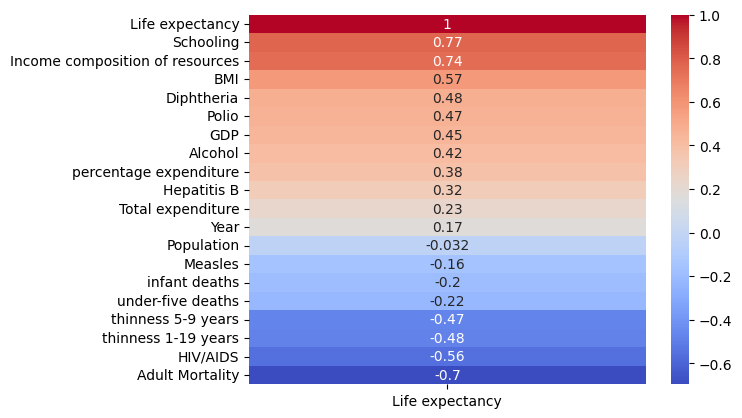

In [31]:
sns.heatmap(correlacao.to_frame(), annot=True, cmap='coolwarm')
plt.show()

e) Quais as features que mais possuem correlação (negativamente ou positivamente) com a saída?

In [32]:
features = ['Year', 'Life expectancy', 'Adult Mortality',
            'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
            'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
            'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
            'thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Calcular a correlação das features com 'Life expectancy'
correlacao = df_reg[features].corr()['Life expectancy']

# Thresholds para correlações positivas e negativas
threshold_positivo = 0.70
threshold_negativo = -0.65

# Lista para armazenar as colunas com alta correlação
high_corr = []

# Iterar sobre a Series de correlações
for index, value in correlacao.items():
    # Selecionar as correlações positivas >= 0.70 e < 1.00
    if threshold_positivo <= value < 1.00:
        high_corr.append((index, value))  # Armazena o índice e o valor
    # Selecionar as correlações negativas <= -0.60
    elif threshold_negativo >= value:
        high_corr.append((index, value))  # Armazena o índice e o valor

# Imprimir as colunas com alta correlação
for corr in high_corr:
    print(f"{corr[0]} é altamente correlacionado(a) com Life expectancy (correlação: {corr[1]})")


Adult Mortality é altamente correlacionado(a) com Life expectancy (correlação: -0.6963593137699746)
Income composition of resources é altamente correlacionado(a) com Life expectancy (correlação: 0.7420545394111916)
Schooling é altamente correlacionado(a) com Life expectancy (correlação: 0.768826798656784)


f) com base na matriz de correlação, encontre duas features que são redundantes entre si.

*Obs:* uma feature redundante com outra é uma feature cuja correlação com outra feature é próxima de 1 ou de -1;

**Resposta:** Além de Life Expectancy vamos checar quais as outras features que estão relacionadas entre si**:**

In [33]:
features_no_target = ['Year', 'Adult Mortality',
            'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
            'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
            'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
            'thinness 5-9 years', 'Income composition of resources', 'Schooling']

correlacao_total = df_reg[features_no_target].corr()

fig = px.imshow(correlacao_total, text_auto=True, aspect="auto")
fig.show()

# Thresholds para correlações positivas e negativas
threshold_positivo = 0.95
threshold_negativo = -0.95

# Lista para armazenar as colunas com alta correlação
high_corr_total = []

# Iterar sobre os valores da matriz de correlações
for index, row in correlacao_total.iterrows():
    for col, value in row.items():
        # Selecionar as correlações positivas >= 0.70 e < 1.00
        if threshold_positivo <= value < 1.00:
            high_corr_total.append((index, col, value))  # Armazena o índice, coluna e o valor
        # Selecionar as correlações negativas <= -0.60
        elif threshold_negativo >= value:
            high_corr_total.append((index, col, value))  # Armazena o índice, coluna e o valor

# Imprimir as colunas com alta correlação
for corr in high_corr_total:
    print(f"{corr[0]} é altamente correlacionado(a) com {corr[1]} (correlação: {corr[2]})")


infant deaths é altamente correlacionado(a) com under-five deaths (correlação: 0.9966281493879862)
under-five deaths é altamente correlacionado(a) com infant deaths (correlação: 0.9966281493879862)


g) com base na correlação dessas duas features redundantes com a variável de saída, qual das duas você removeria do seu dataset, caso lhe fosse pedido para remover a redundância?

**Resposta:** Eu removeria a "infant deaths", porque as mortes desta coluna provavelmente estão incluídas na "under-five deaths". Considerando que a coluna "under-five deaths" contém todas as mortes de crianças com menos de 5 anos, o que englobaria as crianças com até 1 ano de idade da coluna "infant deaths".

h) com base nas correlações das features com a saída, você acredita que esse dataset oferece condições de predizer a variável de saída?

**Resposta:**
Sim, o dataset oferece boas condições para predizer a variável de saída (Life Expectancy). A presença de variáveis com correlações fortes e moderadas indica que o dataset tem informações relevantes. Usar o modelo *XGBoost* pode ser uma excelente opção, pois ele consegue lidar com interações complexas entre variáveis e ajustar melhor as predições.

Além disso, o uso de técnicas de seleção de features ou de regularização (como *Lasso*) pode ajudar a melhorar ainda mais a performance do modelo de *Regressão Linear*, removendo variáveis com pouco impacto, como *Population* ou *Measles*.

**Antes de separar os dados será preciso transformar os dados categóricos das colunas "Status" e "Country" em numéricos.**

In [34]:
print(df_reg['Status_Developing'].value_counts())
print()
df_reg['Country'].unique()

Status_Developing
1    2416
0     512
Name: count, dtype: int64



array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

**1. One-Hot Encoding para** *Status*

Já foi feita durante a regressão linear para preencher os dados nulos. A coluna Status foi binarizada e transformada na coluna Status_Developing, o valor 1 representa "Developing", enquanto que 0 representa "Developed".

**2. Target Encoding para** *Country*

Target Encoding é uma abordagem eficaz quando temos muitas categorias. Ela consiste em substituir o valor de um dado categórico usando a média, ou outras medidas, em relação a coluna target.

Por exemplo, usarei a média ponderada. É uma técnica que leva em consideração o peso (neste caso, "Population") ao calcular a média da variável alvo ("Life expectancy"). Dessa forma, podemos garantir que os países com populações diferentes não tenham a mesma codificação na coluna Country_encoded.

A abordagem de média ponderada pela população é a mais apropriada, pois mantém os valores de Country_encoded em uma escala próxima da variável alvo (Life Expectancy). Isso beneficia tanto a Regressão Linear (que é sensível à escala) quanto o XGBoost (que lida bem com diferentes escalas, mas deve evitar valores exageradamente grandes).

In [35]:
df_encoded = df_reg.copy(deep=True)

# Função para calcular a média ponderada de Life expectancy considerando Population
def weighted_mean(group):
    return np.average(group['Life expectancy'], weights=group['Population'])

# Agrupar por 'Country' e calcular a média ponderada para cada país
weighted_life_expectancy = df_encoded.groupby('Country').apply(weighted_mean).reset_index()

# Renomear a coluna resultante para 'Country_encoded'
weighted_life_expectancy.columns = ['Country', 'Country_encoded']

# Fazer o merge dos resultados de volta ao DataFrame original com base na coluna 'Country'
df_encoded = df_encoded.merge(weighted_life_expectancy, on='Country', how='left')

# Remover a coluna original 'Country'
df_encoded = df_encoded.drop(columns=['Country'])

# Verificar as primeiras linhas
print(df_encoded[['Country_encoded', 'Life expectancy', 'Population']].head())

# Verificar o número de valores únicos na nova coluna
print(f"Número de valores únicos na coluna Country_encoded: {df_encoded['Country_encoded'].nunique()}")


   Country_encoded  Life expectancy  Population
0        59.365851             65.0  33736494.0
1        59.365851             59.9    327582.0
2        59.365851             59.9  31731688.0
3        59.365851             59.5   3696958.0
4        59.365851             59.2   2978599.0
Número de valores únicos na coluna Country_encoded: 183


<ipython-input-35-89a3caa446e8>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Precisamos checar se o número de países se mantém o mesmo depois da transformação, para garantir que não haja países diferentes com o mesmo código/número.**

In [36]:
num_de_paises_original = df_reg['Country'].nunique()
num_de_paises_encoded = df_encoded['Country_encoded'].nunique()

print(f'Número de países no dataset original é: {num_de_paises_original}')
print(f'Número de países no dataset encoded/transformado é: {num_de_paises_encoded}')

Número de países no dataset original é: 183
Número de países no dataset encoded/transformado é: 183


Como podemos ver o número de países se mantém o mesmo, portanto a transformação dos dados foi bem sucedida e sem valores duplicados.

###3. Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [37]:
# Divisão dos dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=['Life expectancy']),
                                                    df_encoded['Life expectancy'],
                                                    test_size=0.3,
                                                    random_state=111)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, 186 to 2924
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2049 non-null   int64  
 1   Adult Mortality                  2049 non-null   float64
 2   infant deaths                    2049 non-null   int64  
 3   Alcohol                          2049 non-null   float64
 4   percentage expenditure           2049 non-null   float64
 5   Hepatitis B                      2049 non-null   float64
 6   Measles                          2049 non-null   int64  
 7   BMI                              2049 non-null   float64
 8   under-five deaths                2049 non-null   int64  
 9   Polio                            2049 non-null   float64
 10  Total expenditure                2049 non-null   float64
 11  Diphtheria                       2049 non-null   float64
 12  HIV/AIDS               

In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 1871 to 576
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             879 non-null    int64  
 1   Adult Mortality                  879 non-null    float64
 2   infant deaths                    879 non-null    int64  
 3   Alcohol                          879 non-null    float64
 4   percentage expenditure           879 non-null    float64
 5   Hepatitis B                      879 non-null    float64
 6   Measles                          879 non-null    int64  
 7   BMI                              879 non-null    float64
 8   under-five deaths                879 non-null    int64  
 9   Polio                            879 non-null    float64
 10  Total expenditure                879 non-null    float64
 11  Diphtheria                       879 non-null    float64
 12  HIV/AIDS                

###4. Tratamento dos dados
Aplique a padronização, de forma separada, nos conjuntos de treinamento e de teste;

In [40]:
# Normalizando os dados usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled[:2]

array([[-0.56130743, -0.66493577, -0.25196121, -0.64831354,  0.41956533,
         0.7680603 , -0.21028338,  0.88082918, -0.25694974,  0.67032329,
        -1.17492307,  0.66891774, -0.32466625,  0.85468759, -0.10312337,
         0.30596838,  0.24781584,  0.85051385,  0.59982335,  0.47330153,
         0.68099809],
       [ 0.74564589,  0.42084234,  0.20321049,  0.07918784, -0.28285782,
         0.29280584,  0.30490972, -0.76416214,  0.16534963,  0.1867602 ,
        -0.70155769,  0.20014959, -0.32466625, -0.33314151, -0.04978045,
        -0.87461532,  1.1095893 ,  0.19516649, -0.14597028,  0.47330153,
        -0.22231181]])

In [42]:
X_test_scaled[:2]

array([[-1.65043519,  0.21478226, -0.22001933, -0.2583128 , -0.37375156,
         0.11998604, -0.21059877,  0.21784783, -0.22762339,  0.09883964,
        -0.24075954,  0.02968845, -0.26867737, -0.50334292, -0.20782392,
        -0.59683092, -0.61395762, -0.31667415, -0.56361471,  0.47330153,
         0.4202099 ],
       [ 0.52782034, -1.10083208, -0.12419371,  0.81918924, -0.34872169,
         0.72485535, -0.20105816, -1.00343361, -0.12204855,  0.45052189,
         0.81488714,  0.62630245,  0.08591883, -0.46930504, -0.19518104,
         0.39856318,  0.33852884, -0.83329834, -0.59344646,  0.47330153,
        -0.93370113]])

#### Escolhendo as melhores features (atributos)

In [43]:
# Separando as features (X) e os rótulos (y)
X = df_encoded[['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing', 'Country_encoded']]
y = df_encoded['Life expectancy']

# Dividindo o conjunto de dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Verificando os tamanhos dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

# Inicializando o normalizador
scaler = StandardScaler()

# Ajusta o scaler apenas no X_train
X_train_norm = scaler.fit_transform(X_train)

# Aplica a normalização ajustado para X_train no X_test
X_test_norm = scaler.transform(X_test)

Tamanho do conjunto de treino: (2049, 21)
Tamanho do conjunto de teste: (879, 21)


In [44]:
# Instanciando o RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, random_state=111)

# Ajusta o modelo
rf.fit(X_train_norm, y_train)

# Exibe as importâncias das features
importances = rf.feature_importances_

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.035 seconds


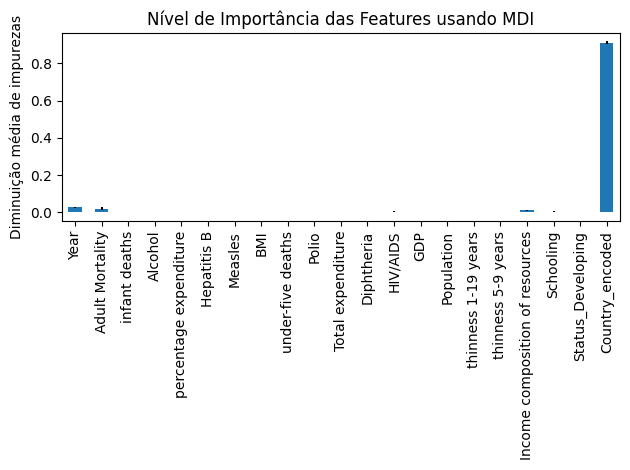

In [45]:
forest_importances = pd.Series(importances, index=['Year','Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing', 'Country_encoded'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Nível de Importância das Features usando MDI')
ax.set_ylabel('Diminuição média de impurezas')
fig.tight_layout()

Permutação

Elapsed time to compute the importances: 19.104 seconds


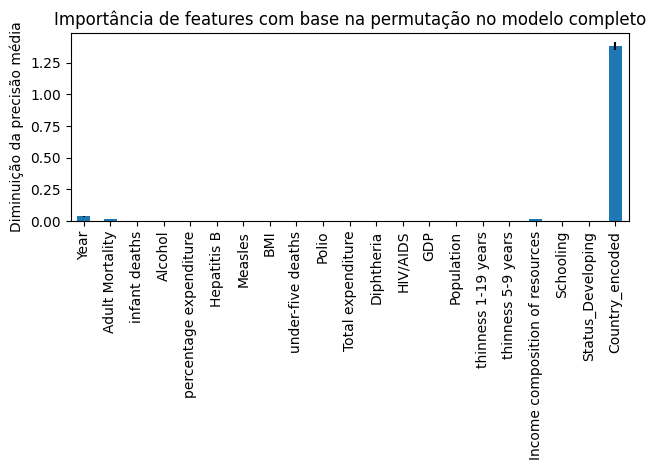

In [46]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test_norm, y_test, n_repeats=10, random_state=11, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing', 'Country_encoded'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title('Importância de features com base na permutação no modelo completo')
ax.set_ylabel('Diminuição da precisão média')
fig.tight_layout()
plt.show()

SelectFromModel

In [47]:
# Select from model
# Seleciona as features mais importantes com base em um threshold
selector = SelectFromModel(rf, threshold=0.02, prefit=True)
X_train_selected = selector.transform(X_train_norm)

# Exibe as features selecionadas
selected_features = X.columns[(selector.get_support())]
print(selected_features)

# Aplicar a mesma transformação no conjunto de teste para garantir
# que ambos tenhas as mesmas features e não haja vazamento de dados do X_test para o modelo
X_test_selected = selector.transform(X_test_norm)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

Index(['Year', 'Country_encoded'], dtype='object')


Todos os três médotos de seleção de features apontaram para os mesmos atributos: **'Adult Mortality', 'HIV/AIDS', 'Income composition of resources'**.

###Regressão Linear

Use a Regressão Linear para predizer a expectativa de vida (variável de saída **Life expectancy**)

**Métricas de regressão:**

- * **neg_mean_squared_error:** Calcula o erro quadrático médio negativo. A versão negativa é usada porque o GridSearchCV sempre maximiza as métricas, então precisamos do valor negativo para minimizar o erro.

- * **neg_mean_absolute_error:** Calcula o erro absoluto médio negativo.

- * **r2:** Calcula o coeficiente de determinação (R²), que é uma métrica comum para avaliar a qualidade do ajuste de modelos de regressão.

- * **refit='r2':** O melhor modelo será escolhido com base no valor do R², que é a métrica que estamos usando como critério de otimização.

* **Gráfico:**

- * O gráfico agora mostra o R² em função das combinações de parâmetros avaliadas no GridSearch.

In [48]:
# Função que aplica o Gridsearch para os algoritmos LinearRegression e KNeighborsRegressor
def grid_search_knn_reg(X, y):
    """
    Executa GridSearchCV para KNeighborsRegressor e LinearRegression com múltiplas métricas.

    :param X_train: Dados de treino (features)
    :param y_train: Dados de treino (target)
    """
    # Definindo múltiplas métricas para o GridSearchCV (métricas para regressão)
    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'r2': 'r2'
    }

    # Configuração do GridSearchCV para o KNeighborsRegressor
    param_grid_knn = {
        'n_neighbors': range(1, 11),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2],  # Usado para a métrica Minkowski
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    # Realizando GridSearchCV para o KNeighborsRegressor
    gs_knn = GridSearchCV(
        estimator=KNeighborsRegressor(),
        param_grid=param_grid_knn,
        scoring=scoring,
        refit='r2',  # Usaremos o r2 para refit
        n_jobs=-1,
        cv=5,
        return_train_score=True
    )

    # Ajustar o modelo ao conjunto de treino
    gs_knn.fit(X, y)

    # Obter os resultados
    results_knn = gs_knn.cv_results_

    # Exibir os melhores parâmetros e o melhor score
    print("\nMelhores Parâmetros KNeighborsRegressor:")
    print(f"Melhor número de vizinhos: {gs_knn.best_params_['n_neighbors']}")
    print(f"Melhor opção de weights: {gs_knn.best_params_['weights']}")
    print(f"Melhor opção de metric: {gs_knn.best_params_['metric']}")
    print(f"Melhor opção de p: {gs_knn.best_params_['p']}")
    print(f"Melhor opção de algorithm: {gs_knn.best_params_['algorithm']}")
    print(f"Melhor R2 score: {gs_knn.best_score_:.4f}")

    # Gráfico dos resultados usando R2 (refit)
    mean_test_scores_knn = results_knn['mean_test_r2']
    num_param_combinations_knn = len(results_knn['params'])

    plt.figure(figsize=(10,6))
    plt.plot(range(1, num_param_combinations_knn + 1), mean_test_scores_knn, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=6)
    plt.title('R2 Score vs Parameter Combination - KNeighborsRegressor')
    plt.xlabel('Parameter Combination')
    plt.ylabel('R2 Score')
    plt.show()

    return gs_knn  # Retornar os objetos de GridSearch para análise posterior


In [49]:
# Função que aplica o Gridsearch para os algoritmos LinearRegression e KNeighborsRegressor
def grid_search_linreg(X, y):
    """
    Executa GridSearchCV para KNeighborsRegressor e LinearRegression com múltiplas métricas.

    :param X_train: Dados de treino (features)
    :param y_train: Dados de treino (target)
    """
    # Definindo múltiplas métricas para o GridSearchCV (métricas para regressão)
    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'r2': 'r2'
    }

    # Configuração do GridSearchCV para o LinearRegression (aqui só otimizará com base na métrica)
    param_grid_lr = {
        'fit_intercept': [True, False],  # LinearRegression tem poucos parâmetros ajustáveis
        'positive': [True, False]
    }

    # Realizando GridSearchCV para o LinearRegression
    gs_lr = GridSearchCV(
        estimator=LinearRegression(),
        param_grid=param_grid_lr,
        scoring=scoring,
        refit='r2',  # Usaremos o r2 para refit
        n_jobs=-1,
        cv=5,
        return_train_score=True
    )

    # Ajustar o modelo ao conjunto de treino
    gs_lr.fit(X, y)

    # Obter os resultados
    results_lr = gs_lr.cv_results_

    # Exibir os melhores parâmetros e o melhor score
    print("\nMelhores Parâmetros LinearRegression:")
    print(f"Melhor fit_intercept: {gs_lr.best_params_['fit_intercept']}")
    print(f"Melhor normalize: {gs_lr.best_params_['positive']}")
    print(f"Melhor R2 score: {gs_lr.best_score_:.4f}")

    # Gráfico dos resultados usando R2 (refit)
    mean_test_scores_lr = results_lr['mean_test_r2']
    num_param_combinations_lr = len(results_lr['params'])

    plt.figure(figsize=(10,6))
    plt.plot(range(1, num_param_combinations_lr + 1), mean_test_scores_lr, color='green', linestyle='dashed', marker='o',
             markerfacecolor='orange', markersize=6)
    plt.title('R2 Score vs Parameter Combination - LinearRegression')
    plt.xlabel('Parameter Combination')
    plt.ylabel('R2 Score')
    plt.show()

    return gs_lr  # Retornar os objetos de GridSearch para análise posterior

**GridSearch nos dados com todas as features:**

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast




Melhores Parâmetros KNeighborsRegressor:
Melhor número de vizinhos: 10
Melhor opção de weights: uniform
Melhor opção de metric: euclidean
Melhor opção de p: 1
Melhor opção de algorithm: auto
Melhor R2 score: -0.0985


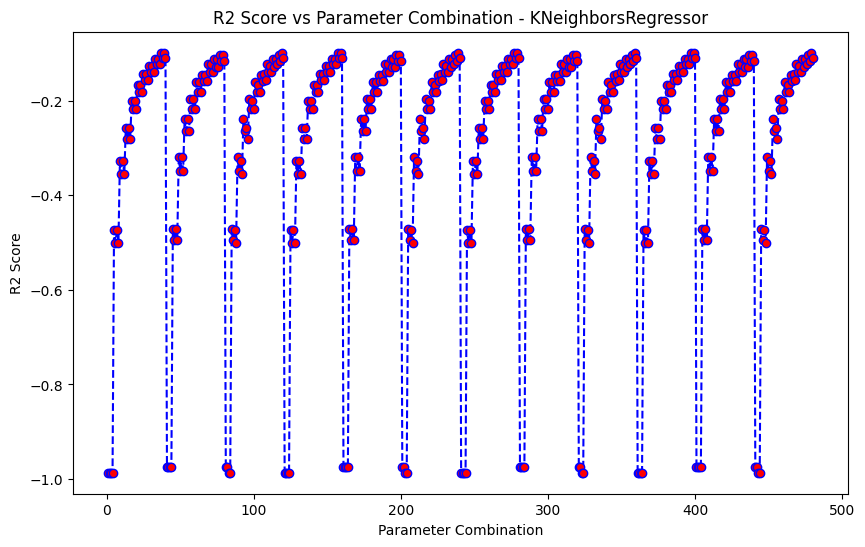

In [50]:
# Aplicando o as funções nos dados de treino para encontrar os melhores parâmetros
gs_knn_original = grid_search_knn_reg(X_train_scaled, y_train)


Melhores Parâmetros LinearRegression:
Melhor fit_intercept: True
Melhor normalize: True
Melhor R2 score: -0.0105


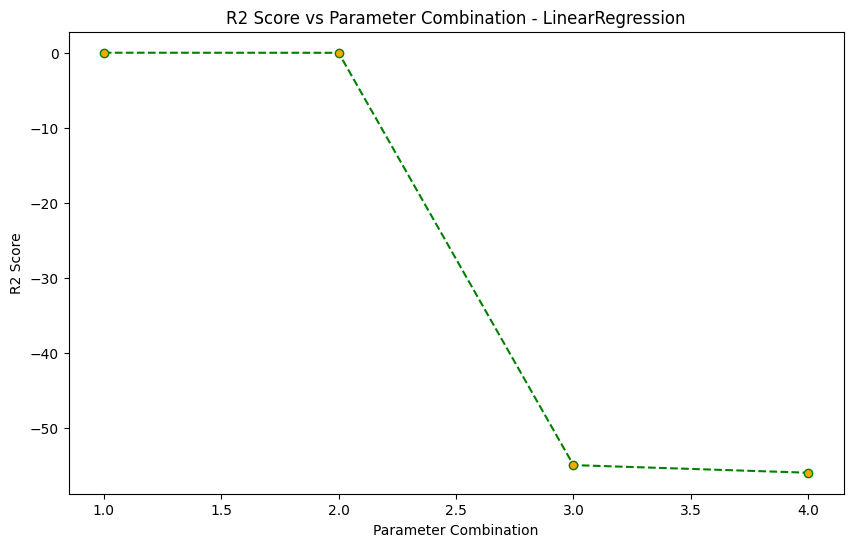

In [51]:
# Aplicando o as funções nos dados de treino para encontrar os melhores parâmetros
gs_lr_original = grid_search_linreg(X_train_scaled, y_train)

In [52]:
# Acessar os melhores parâmetros e pontuações após o grid search K-NN Regressor
print(gs_knn_original.best_params_)
print(gs_knn_original.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
-0.09850503405469273


In [53]:
# Acessar os melhores parâmetros e pontuações após o grid search Linear Regression
print(gs_lr_original.best_params_)
print(gs_lr_original.best_score_)

{'fit_intercept': True, 'positive': True}
-0.0104845411557976


As métricas ficaram muito ruins.

**GridSearch nos dados com as features selecionadas:**

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast




Melhores Parâmetros KNeighborsRegressor:
Melhor número de vizinhos: 10
Melhor opção de weights: uniform
Melhor opção de metric: manhattan
Melhor opção de p: 1
Melhor opção de algorithm: ball_tree
Melhor R2 score: 0.9536


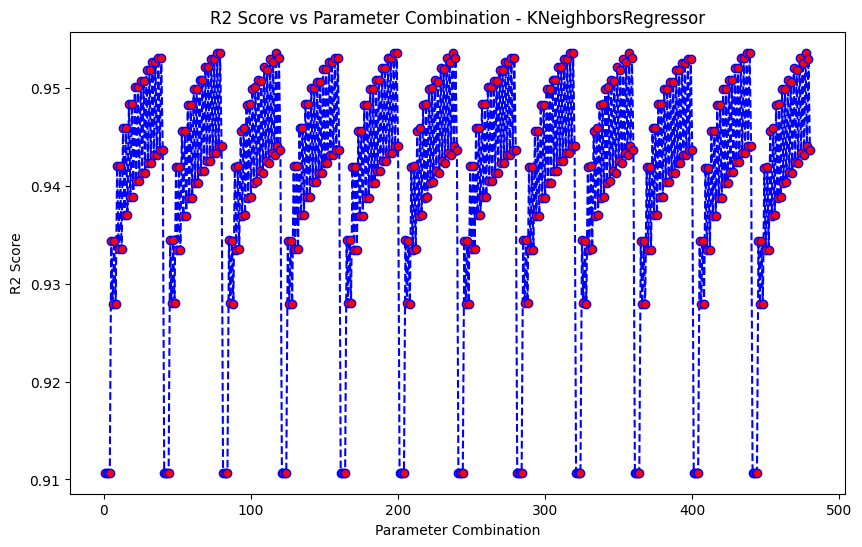

In [54]:
# Aplicando o as funções nos dados de treino para encontrar os melhores parâmetros
gs_knn = grid_search_knn_reg(X_train_selected, y_train)


Melhores Parâmetros LinearRegression:
Melhor fit_intercept: True
Melhor normalize: True
Melhor R2 score: 0.9472


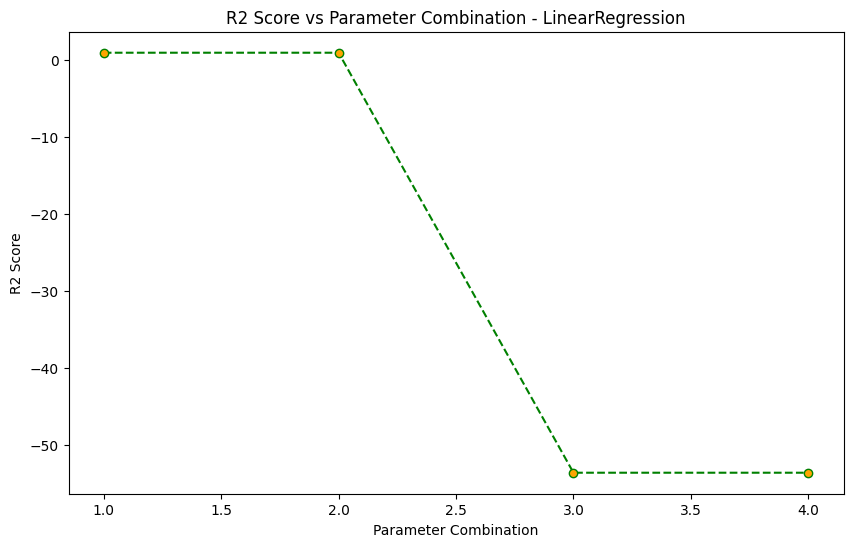

In [55]:
gs_lr = grid_search_linreg(X_train_selected, y_train)

In [56]:
# Acessar os melhores parâmetros e pontuações após o grid search K-NN Regressor
print(gs_knn.best_params_)
print(gs_knn.best_score_)

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.9536081411549049


In [57]:
# Acessar os melhores parâmetros e pontuações após o grid search Linear Regression
print(gs_lr.best_params_)
print(gs_lr.best_score_)

{'fit_intercept': True, 'positive': True}
0.9472433973627903


#### Aplicando os melhores parâmetros encontrados pelo GridSearch nos respectivos algoritmos:

**Usando todas as features:**

In [58]:
# K-NN Regressor todas as features
knn_original = KNeighborsRegressor(n_neighbors=10, weights='uniform', metric='euclidean', p=1, algorithm='auto')
knn_original.fit(X_train_scaled, y_train)
y_pred_knn_original = knn_original.predict(X_test_scaled)

# Calcula Mean Squared Error (MSE)
mse_knn_original = mean_squared_error(y_test, y_pred_knn_original)

# Calcula R-squared (R^2)
r2_knn_original = r2_score(y_test, y_pred_knn_original)

# Imprime os resultados
print(f"Mean Squared Error (MSE): {mse_knn_original}")
print(f"R-squared (R^2): {r2_knn_original}")

Mean Squared Error (MSE): 106.37253879408419
R-squared (R^2): -0.126182305578864


In [59]:
# Linear Regression todas as features
reg_originais = LinearRegression(fit_intercept=True, positive=True)
reg_originais.fit(X_train_scaled,y_train)

y_pred_lre_original = reg_originais.predict(X_test_scaled)

# Calcula Mean Squared Error (MSE)
mse_lre_original = mean_squared_error(y_test, y_pred_lre_original)

# Calcula R-squared (R^2)
r2_lre_original = r2_score(y_test, y_pred_lre_original)

# Imprime os resultados
print(f"Mean Squared Error (MSE): {mse_lre_original}")
print(f"R-squared (R^2): {r2_lre_original}")

Mean Squared Error (MSE): 93.91292050102555
R-squared (R^2): 0.00572957520337547


**Usando as features selecionadas:**

In [60]:
# K-NN Regressor as features selecionadas
knn_selected = KNeighborsRegressor(n_neighbors=10, weights='uniform', metric='manhattan', p=1, algorithm='ball_tree')
knn_selected.fit(X_train_selected, y_train)
y_pred_knn_selected = knn_selected.predict(X_test_selected)

# Calcula Mean Squared Error (MSE)
mse_knn_selected = mean_squared_error(y_test, y_pred_knn_selected)

# Calcula R-squared (R^2)
r2_knn_selected = r2_score(y_test, y_pred_knn_selected)

# Imprime os resultados
print(f"Mean Squared Error (MSE): {mse_knn_selected}")
print(f"R-squared (R^2): {r2_knn_selected}")

Mean Squared Error (MSE): 4.226717519908987
R-squared (R^2): 0.9552510964242736


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsRegressor was fitted without feature names



In [61]:
# Linear Regression as features selecionadas
reg_selected = LinearRegression(fit_intercept=True, positive=True)
reg_selected.fit(X_train_selected,y_train)
y_pred_lre_selected = reg_selected.predict(X_test_selected)

# Calcula Mean Squared Error (MSE)
mse_lre_selected = mean_squared_error(y_test, y_pred_lre_selected)

# Calcula R-squared (R^2)
r2_lre_selected = r2_score(y_test, y_pred_lre_selected)

# Imprime os resultados
print(f"Mean Squared Error (MSE): {mse_lre_selected}")
print(f"R-squared (R^2): {r2_lre_selected}")

Mean Squared Error (MSE): 4.714720626449849
R-squared (R^2): 0.9500845330434963


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



####Avaliação da Regressão Linear
Crie gráficos de linha para visualizar a performance do modelo.

##### Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

In [62]:
def grafico_valor_predito_x_real_completo(y_teste, y_predito, modelo):
    # Gráfico de dispersão de valores preditos vs valores reais
    plt.figure(figsize=(10, 6))

    # Plotando os pontos preditos (eixo y) em relação aos reais (eixo x)
    plt.scatter(y_teste, y_predito, color='blue', alpha=0.6, label='Valores Preditos')

    # Plotando uma linha de referência (y = x) para indicar o ajuste perfeito
    max_value = max(max(y_teste), max(y_predito))
    min_value = min(min(y_teste), min(y_predito))
    plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Linha Ideal (y = x)')

    plt.title(f'Gráfico de Dispersão - Valores Preditos vs Valores Reais ({modelo})')
    plt.xlabel('Valores Reais (y_test)')
    plt.ylabel('Valores Preditos (y_pred)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [63]:
def grafico_dispersao_ytest_vs_ypred(y_teste, X, modelo):
    # Gráfico de dispersão de valores preditos vs valores reais
    plt.figure(figsize=(20, 7))
    idx = np.argsort(y_teste.values)
    preds = modelo.predict(X)
    plt.scatter(range(len(y_teste)), preds[idx] , label= "Predictions")
    plt.scatter(range(len(y_teste)), y_teste.iloc[idx], label="Orignal values")
    plt.legend()
    plt.show()

**Com todas as features:**

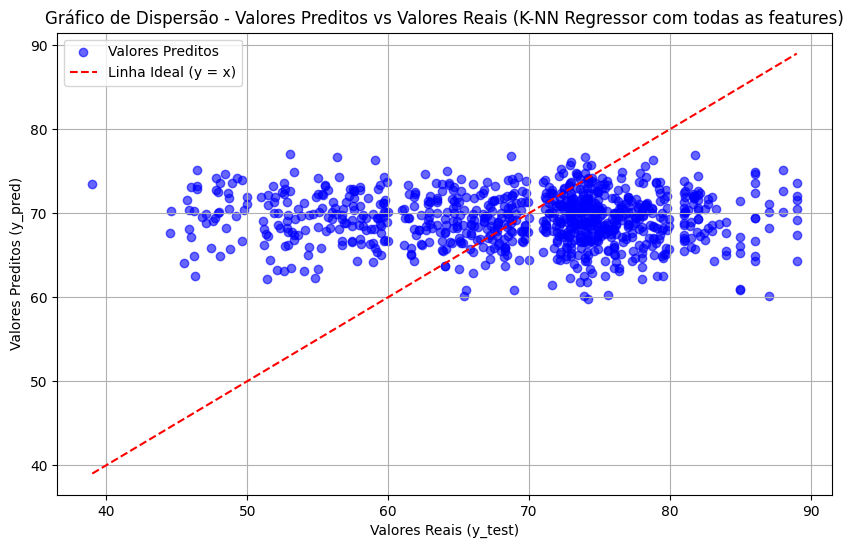

In [64]:
grafico_valor_predito_x_real_completo(y_test, y_pred_knn_original, 'K-NN Regressor com todas as features')

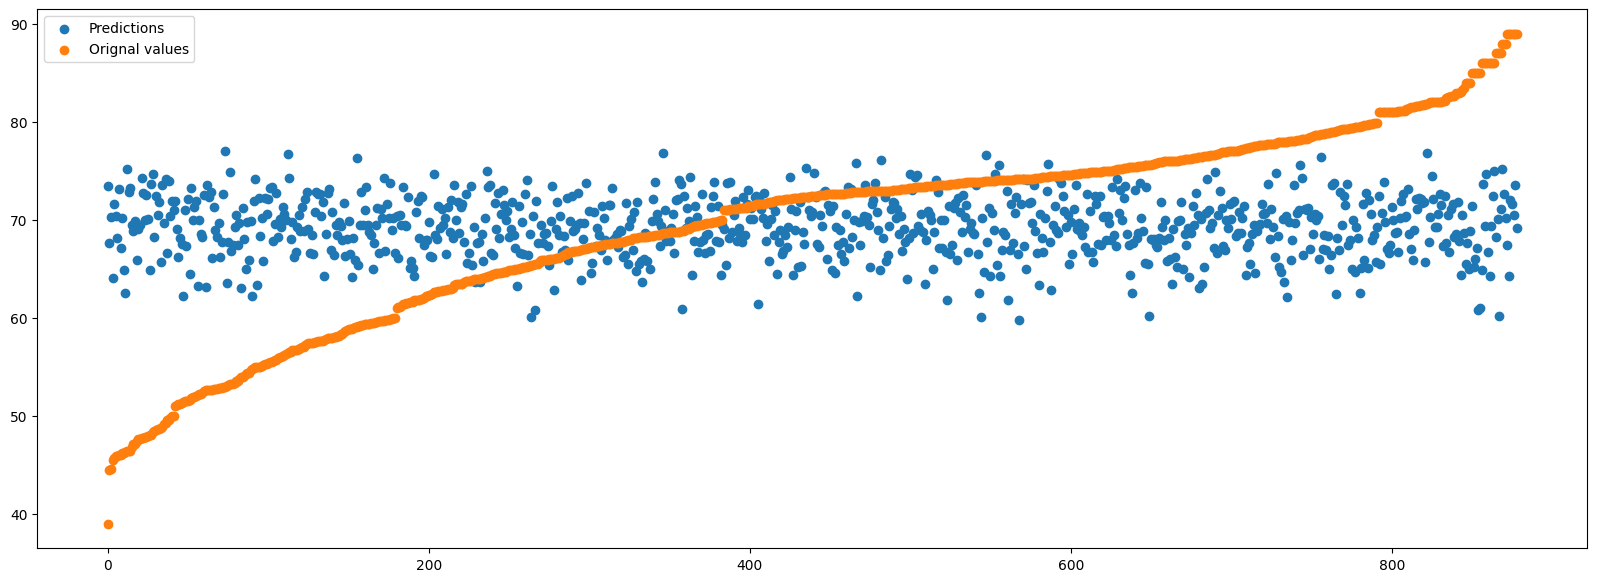

In [65]:
grafico_dispersao_ytest_vs_ypred(y_test, X_test_scaled, knn_original)

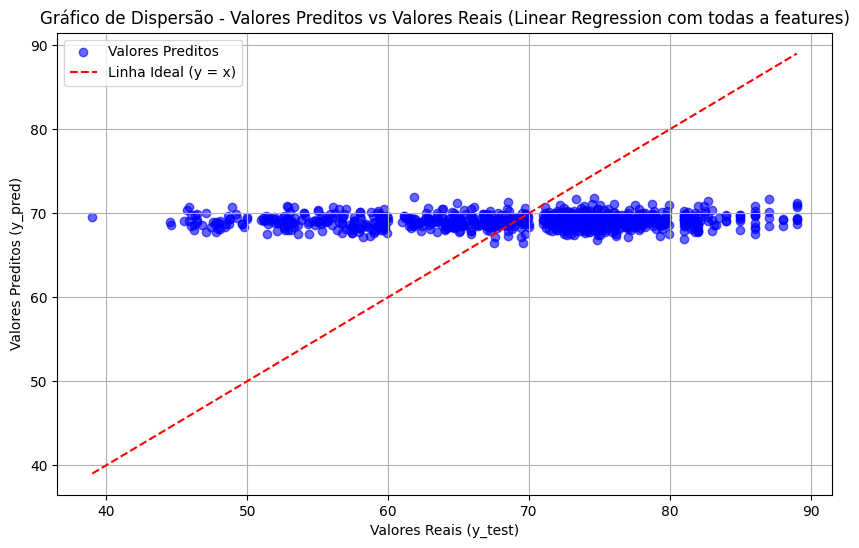

In [66]:
grafico_valor_predito_x_real_completo(y_test, y_pred_lre_original, 'Linear Regression com todas a features')

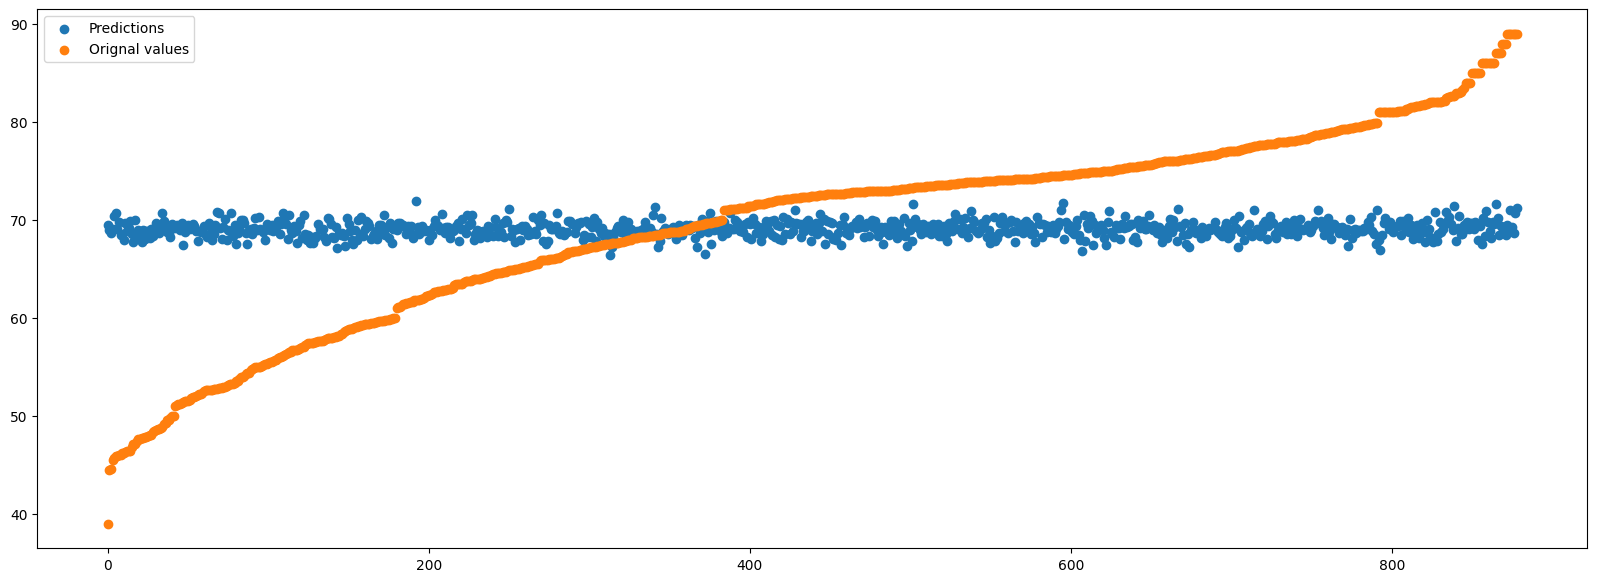

In [67]:
grafico_dispersao_ytest_vs_ypred(y_test, X_test_scaled, reg_originais)

**Com as features selecionadas:**

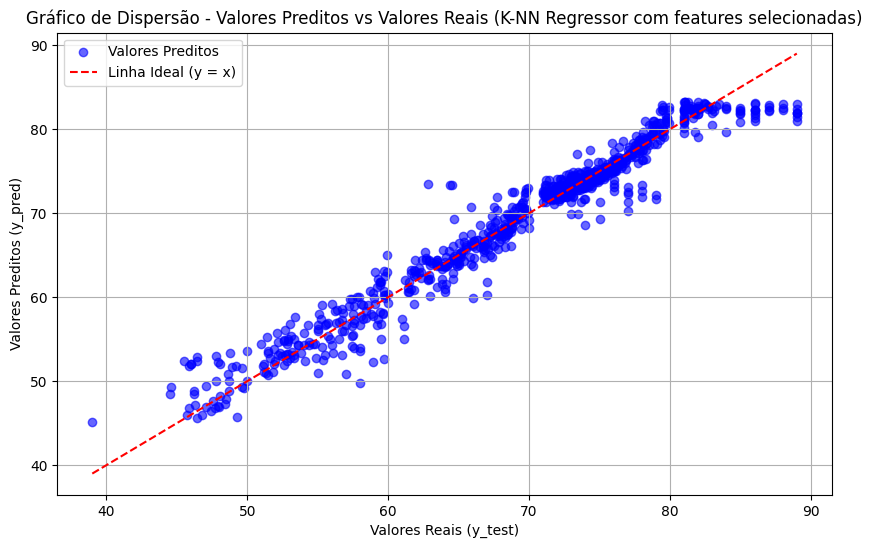

In [68]:
grafico_valor_predito_x_real_completo(y_test, y_pred_knn_selected, 'K-NN Regressor com features selecionadas')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsRegressor was fitted without feature names



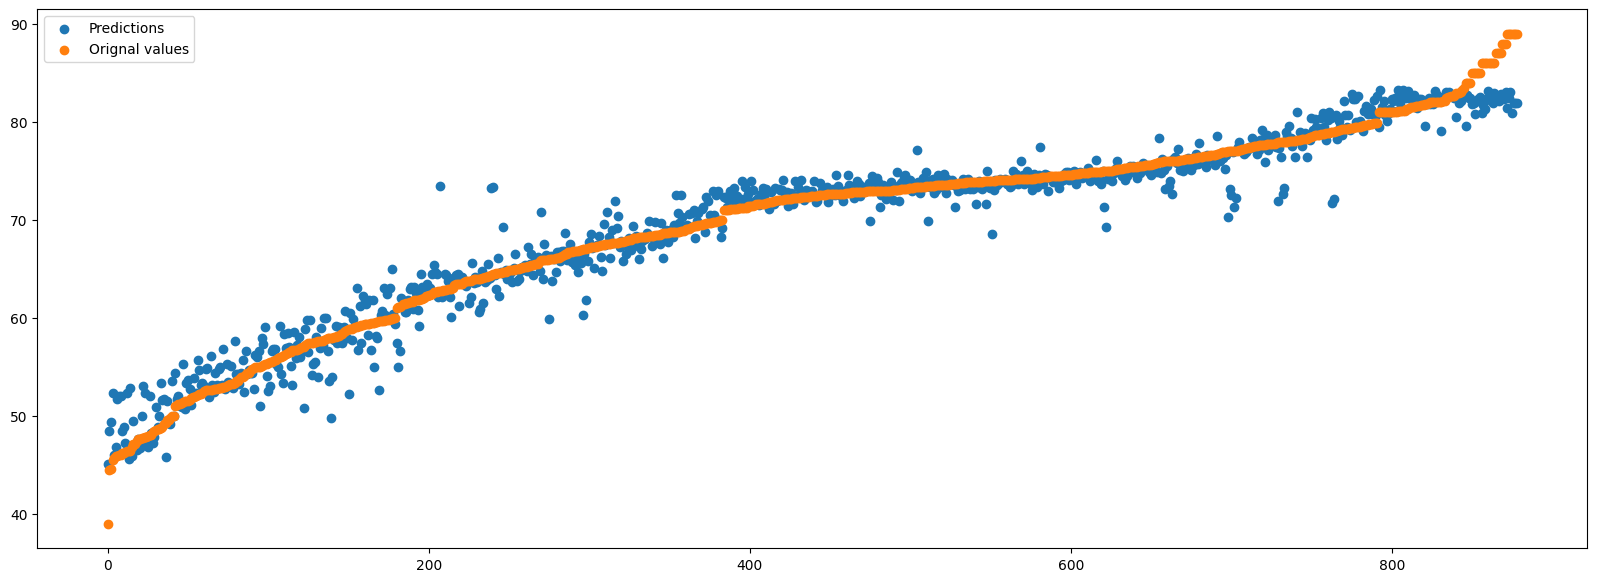

In [69]:
grafico_dispersao_ytest_vs_ypred(y_test, X_test_selected, knn_selected)

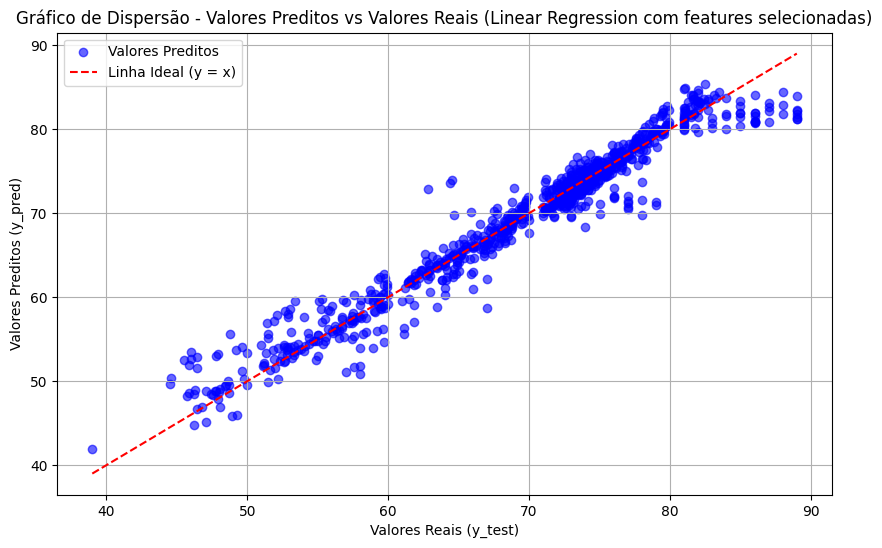

In [70]:
grafico_valor_predito_x_real_completo(y_test, y_pred_lre_selected, 'Linear Regression com features selecionadas')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



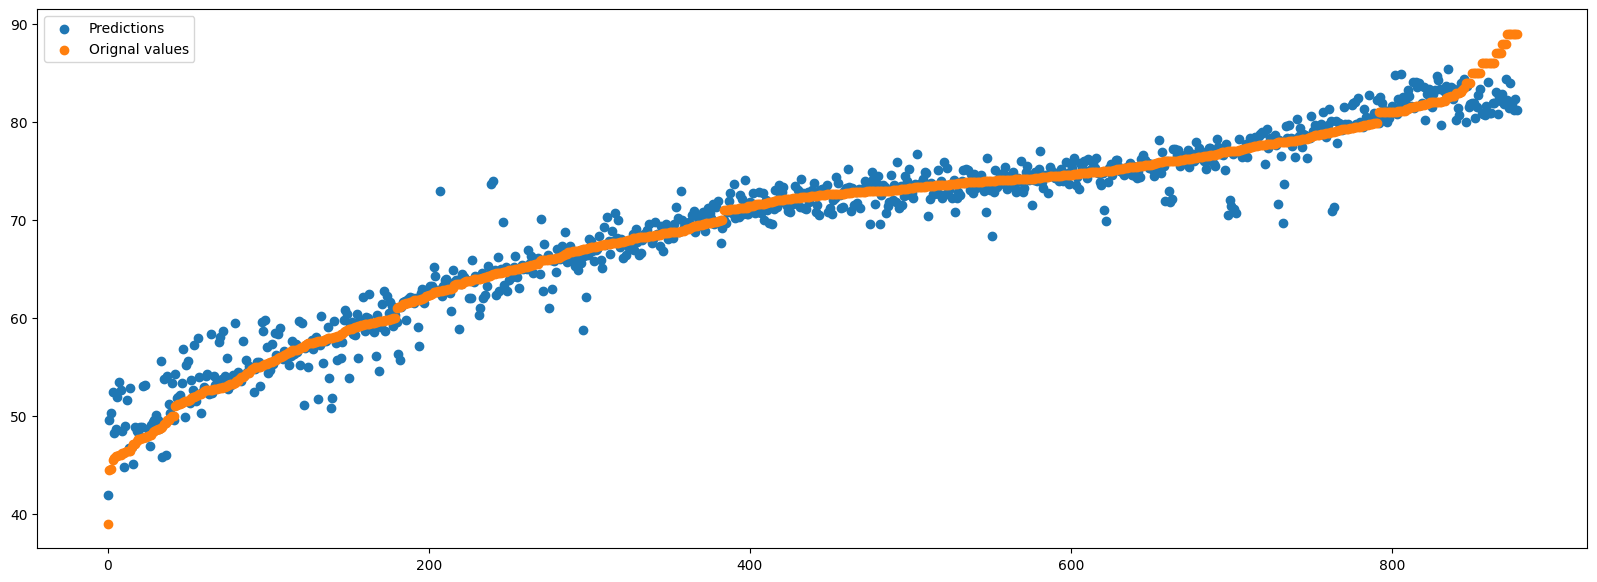

In [71]:
grafico_dispersao_ytest_vs_ypred(y_test, X_test_selected, reg_selected)

Para facilitar a visualização, faça um gráfico apenas dos 100 primeiros pontos.

In [72]:
# Função que gera o gráfico
def grafico_valor_predito_x_real_100(y_teste, y_predito, tipo_modelo):
  # Limitar aos 100 primeiros pontos
  y_teste_100 = y_test[:100]
  y_predito_100 = y_pred_knn_original[:100]

  # Gráfico de dispersão de valores preditos vs valores reais (apenas os primeiros 100 pontos)
  plt.figure(figsize=(10, 6))

  # Plotando os 100 primeiros pontos preditos (eixo y) em relação aos reais (eixo x)
  plt.scatter(y_teste_100, y_predito_100, color='blue', alpha=0.6, label='Valores Preditos')

  # Plotando uma linha de referência (y = x) para indicar o ajuste perfeito
  max_value = max(max(y_teste_100), max(y_predito_100))
  min_value = min(min(y_teste_100), min(y_predito_100))
  plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Linha Ideal (y = x)')

  plt.title(f'Gráfico de Dispersão - 100 Primeiros Valores Preditos vs Valores Reais ({tipo_modelo})')
  plt.xlabel('Valores Reais (y_test)')
  plt.ylabel('Valores Preditos (y_pred)')
  plt.legend()
  plt.grid(True)
  plt.show()

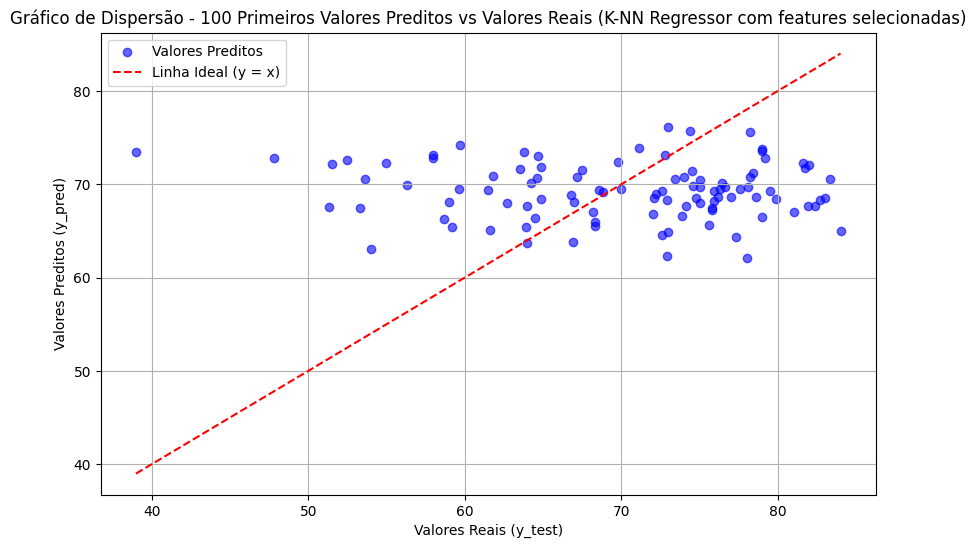

In [73]:
grafico_valor_predito_x_real_100(y_test, y_pred_knn_selected, 'K-NN Regressor com features selecionadas')

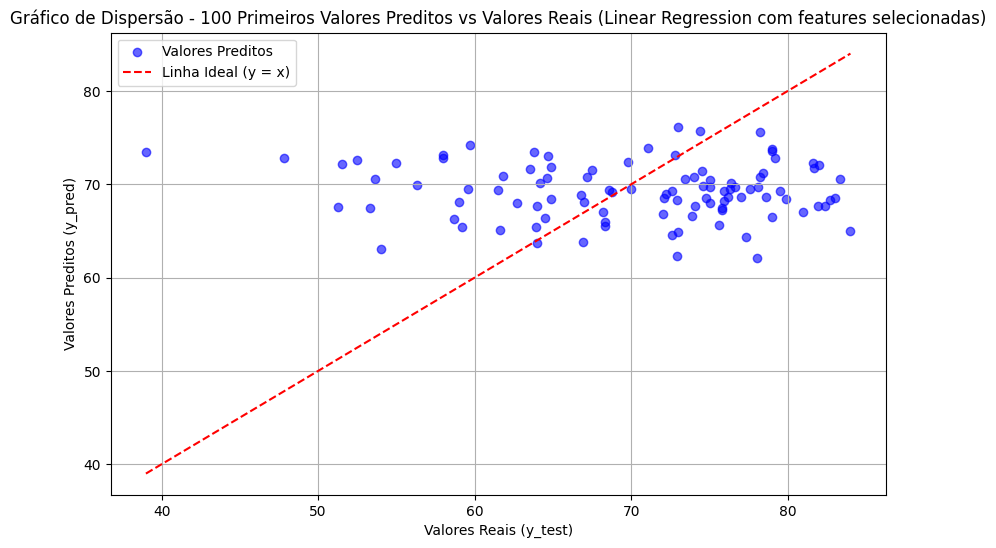

In [74]:
grafico_valor_predito_x_real_100(y_test, y_pred_lre_selected, 'Linear Regression com features selecionadas')

Agora, faça um gráfico exibindo o erro entre os pontos (valor real - valor predito) - Resíduo.

In [75]:
def grafico_residuos(y_teste, y_predito, tipo_modelo):
    # Limitar aos 100 primeiros pontos
    ytest = y_teste
    ypred = y_predito

    # Calcular os resíduos (erro: valor real - valor predito)
    residuos = ytest - ypred

    # Gráfico de resíduos
    plt.figure(figsize=(10, 6))

    # Plotar os resíduos
    plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.6, label='Resíduos')

    # Adicionar uma linha horizontal no valor 0 (onde não há erro)
    plt.axhline(y=0, color='red', linestyle='--', label='Sem Erro (resíduo = 0)')

    plt.title(f'Gráfico de Resíduos ({tipo_modelo})')
    plt.xlabel('Índice do Ponto')
    plt.ylabel('Resíduo (Valor Real - Valor Predito)')
    plt.legend()
    plt.grid(True)
    plt.show()

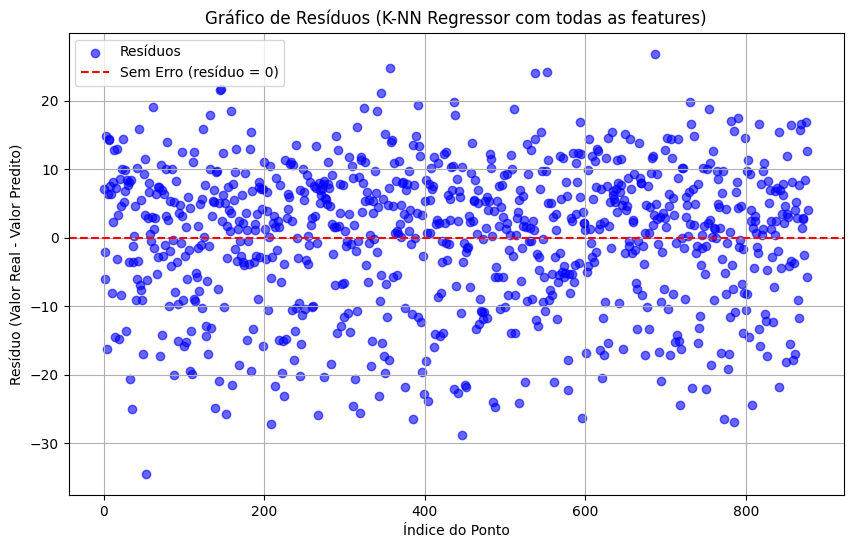

In [76]:
grafico_residuos(y_test, y_pred_knn_original, 'K-NN Regressor com todas as features')

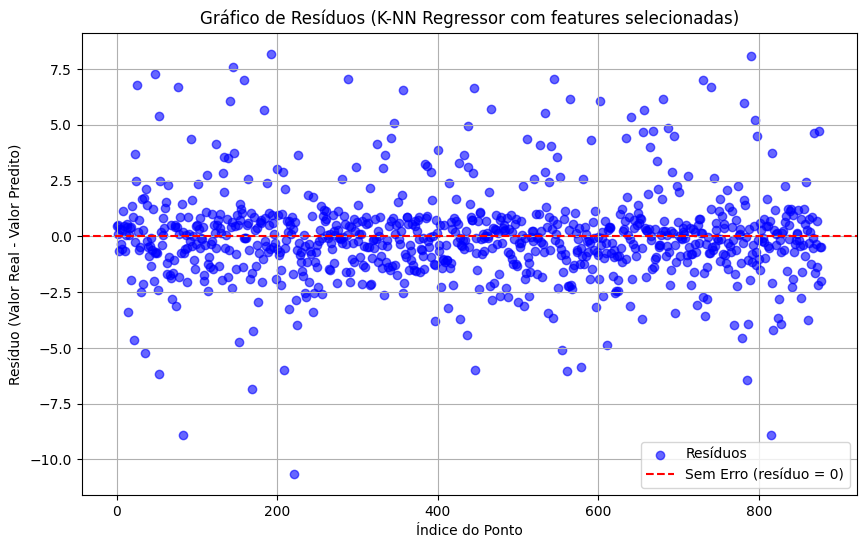

In [77]:
grafico_residuos(y_test, y_pred_knn_selected, 'K-NN Regressor com features selecionadas')

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

**Resposta:** Os modelos com os atributos selecionados conseguiu um bom desempenho, com predições muito próximas dos dados reais.

##### Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (MEAN, MAPE, MSE, RMSE e R²) e verifique se sua impressão visual se confirma.

In [78]:
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [79]:
# Analise as métricas do Knn com todas as features
print_metrics(y_test, y_pred_knn_original)

MEAN:  8.27032992036405
MAPE:  0.12856365438205467
MSE:  106.37253879408419
RMSE:  11315.117009498947
R²:  -0.126182305578864


In [80]:
# Analise as métricas Linear Regression com todas as features
print_metrics(y_test, y_pred_lre_original)

MEAN:  7.932772999761825
MAPE:  0.12306489251302205
MSE:  93.91292050102555
RMSE:  8819.636637031947
R²:  0.00572957520337547


In [81]:
# Analise as métricas do Knn com as features selecionadas
print_metrics(y_test, y_pred_knn_selected)

MEAN:  1.3674288964732648
MAPE:  0.02068140815878555
MSE:  4.226717519908987
RMSE:  17.865140993105577
R²:  0.9552510964242736


In [82]:
# Analise as métricas Linear Regression com as features selecionadas
print_metrics(y_test, y_pred_lre_selected)

MEAN:  1.441888710625542
MAPE:  0.021684755891466668
MSE:  4.714720626449849
RMSE:  22.228590585471657
R²:  0.9500845330434963


**Resposta:** As métricas confirmaram o que os gráficos já tinham mostrado. Que os modelos com todas a features tiveram um desempenho muito baixo, enquanto que os modelos com as features selecionadas tiveram um desempenho muito bom, em torno de 95%.

##### Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [83]:
# Validação cruzada com o modelo K-NN regressor com os atributos selecionados

# Realizar a validação cruzada com 10 folds usando a métrica R2
# cv=10 especifica 10 folds, e scoring='r2' define a métrica a ser usada
r2_scores_knn = cross_val_score(knn_selected, X_train_selected, y_train, cv=10, scoring='r2')

# Exibir os resultados de cada fold
print(f"R2 scores para cada fold: {r2_scores_knn}")

# Exibir a média e o desvio padrão dos scores
print(f"Média do R2: {r2_scores_knn.mean():.4f}")
print(f"Desvio padrão do R2: {r2_scores_knn.std():.4f}")

R2 scores para cada fold: [0.95547311 0.96311498 0.93265455 0.95162967 0.96783908 0.94928216
 0.94668677 0.95933259 0.94771906 0.95604782]
Média do R2: 0.9530
Desvio padrão do R2: 0.0094


In [84]:
# Validação cruzada com o modelo regressão linear com os atributos selecionados

# Realizar a validação cruzada com 10 folds usando a métrica R2
# cv=10 especifica 10 folds, e scoring='r2' define a métrica a ser usada
r2_scores_lre = cross_val_score(reg_selected, X_train_selected, y_train, cv=10, scoring='r2')

# Exibir os resultados de cada fold
print(f"R2 scores para cada fold: {r2_scores_lre}")

# Exibir a média e o desvio padrão dos scores
print(f"Média do R2: {r2_scores_lre.mean():.4f}")
print(f"Desvio padrão do R2: {r2_scores_lre.std():.4f}")

R2 scores para cada fold: [0.95483241 0.95586788 0.93275485 0.94935615 0.96279387 0.94688015
 0.92609618 0.94876935 0.94622924 0.94714836]
Média do R2: 0.9471
Desvio padrão do R2: 0.0102


**Análise dos Resultados:**

1. **K-NN Regressor:**

* R² scores para cada fold: Os valores variam entre 0.9326 e 0.9678, o que indica que o modelo K-NN está capturando bem a variação nos dados.
Média do R²: 0.9530. Um valor alto de R² indica que o modelo explica bem a variabilidade dos dados.

* A média acima de 0.95 sugere um ajuste bastante bom para os dados selecionados.

* Desvio padrão do R²: 0.0094. Um desvio padrão baixo indica que o desempenho do modelo é consistente nos diferentes folds da validação cruzada.

2. **Regressão Linear:**

* R² scores para cada fold: Os valores variam entre 0.9261 e 0.9628, o que ainda é um bom desempenho, mas levemente inferior ao K-NN.

* Média do R²: 0.9471. Embora seja também muito próximo de 1, o desempenho é ligeiramente inferior ao K-NN.

* Desvio padrão do R²: 0.0102. Esse valor é um pouco maior que o desvio padrão do K-NN, o que sugere que a regressão linear pode ser ligeiramente menos consistente em sua performance entre os diferentes folds.

**Conclusão:**

* **K-NN Regressor** teve um desempenho ligeiramente superior à Regressão Linear tanto em termos de média de R² (0.9530 vs 0.9471) quanto em termos de consistência (menor desvio padrão).

* **Regressão Linear**, embora tenha um desempenho ligeiramente inferior, ainda é uma boa escolha para esse problema, com um R² médio de 0.9471 e uma interpretabilidade maior.

###XGBoost

Use o modelo XGBoost para predizer a expectativa de vida (variável de saída **Life expectancy**)

**Parâmetros Ajustados para o XGBoost:**

- **n_estimators**: Número de árvores no modelo.

- **learning_rate:** Taxa de aprendizado (também conhecido como shrinkage).

- **max_depth:** Profundidade máxima das árvores.

- **min_child_weight:** Peso mínimo de uma folha da árvore.

- **subsample:** Porcentagem de amostras usadas em cada árvore.

- **colsample_bytree:** Porcentagem de features usadas em cada árvore.

- **gamma:** Termo de regularização que controla a complexidade do modelo.

- **reg_alpha:** Regularização L1 (lasso).

- **reg_lambda:** Regularização L2 (ridge).

In [104]:
# Aplicando o GridSearch para encontrar os melhores hiperparâmetros para o XGBoost
def grid_search_xgboost_reg(X, y):
    """
    Executa GridSearchCV para o XGBoost com múltiplas métricas.

    :param X: Dados de treino (features)
    :param y: Dados de treino (target)
    """
    # Definindo múltiplas métricas para o GridSearchCV (métricas para regressão)
    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'r2': 'r2'
    }

    # Parâmetros para o GridSearchCV do XGBoost
    param_grid_xgb = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]}
    """'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 1.5, 2]
    }"""

    # Configuração do GridSearchCV para o XGBRegressor
    gs_xgb = GridSearchCV(
        estimator=XGBRegressor(objective='reg:squarederror'),  # Modelo de regressão
        param_grid=param_grid_xgb,
        scoring=scoring,
        refit='r2',  # Usaremos o r2 para refit
        n_jobs=-1,
        cv=5,
        return_train_score=True
    )

    # Ajustar o modelo ao conjunto de treino
    gs_xgb.fit(X, y)

    # Obter os resultados
    results_xgb = gs_xgb.cv_results_

    # Exibir os melhores parâmetros e o melhor score
    print("\nMelhores Parâmetros XGBoost:")
    print(f"Melhor n_estimators: {gs_xgb.best_params_['n_estimators']}")
    print(f"Melhor learning_rate: {gs_xgb.best_params_['learning_rate']}")
    print(f"Melhor max_depth: {gs_xgb.best_params_['max_depth']}")
    #print(f"Melhor min_child_weight: {gs_xgb.best_params_['min_child_weight']}")
    #print(f"Melhor subsample: {gs_xgb.best_params_['subsample']}")
    #print(f"Melhor colsample_bytree: {gs_xgb.best_params_['colsample_bytree']}")
    #print(f"Melhor gamma: {gs_xgb.best_params_['gamma']}")
    #print(f"Melhor reg_alpha: {gs_xgb.best_params_['reg_alpha']}")
    #print(f"Melhor reg_lambda: {gs_xgb.best_params_['reg_lambda']}")
    print(f"Melhor R2 score: {gs_xgb.best_score_:.4f}")

    # Gráfico dos resultados usando R2 (refit)
    mean_test_scores_xgb = results_xgb['mean_test_r2']
    num_param_combinations_xgb = len(results_xgb['params'])

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_param_combinations_xgb + 1), mean_test_scores_xgb, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=6)
    plt.title('R2 Score vs Parameter Combination - XGBoost')
    plt.xlabel('Parameter Combination')
    plt.ylabel('R2 Score')
    plt.show()

    return gs_xgb  # Retornar o objeto do GridSearch para análise posterior

In [99]:
def randomized_search_xgboost_reg(X, y):
    """
    Executa RandomizedSearchCV para o XGBoost com múltiplas métricas.

    :param X: Dados de treino (features)
    :param y: Dados de treino (target)
    """
    # Definindo múltiplas métricas para o RandomizedSearchCV (métricas para regressão)
    scoring = {
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
        'r2': 'r2'
    }

    # Parâmetros para o RandomizedSearchCV do XGBoost
    param_dist_xgb = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 1.5, 2]
    }

    # Configuração do RandomizedSearchCV para o XGBRegressor
    rs_xgb = RandomizedSearchCV(
        estimator=XGBRegressor(objective='reg:squarederror'),  # Modelo de regressão
        param_distributions=param_dist_xgb,
        scoring=scoring,
        refit='r2',  # Usaremos o r2 para refit
        n_jobs=-1,
        cv=5,
        n_iter=50,  # Número de combinações aleatórias para testar (ajuste conforme necessário)
        random_state=42,
        return_train_score=True
    )

    # Ajustar o modelo ao conjunto de treino
    rs_xgb.fit(X, y)

    # Obter os resultados
    results_xgb = rs_xgb.cv_results_

    # Exibir os melhores parâmetros e o melhor score
    print("\nMelhores Parâmetros XGBoost:")
    print(f"Melhor n_estimators: {rs_xgb.best_params_['n_estimators']}")
    print(f"Melhor learning_rate: {rs_xgb.best_params_['learning_rate']}")
    print(f"Melhor max_depth: {rs_xgb.best_params_['max_depth']}")
    print(f"Melhor min_child_weight: {rs_xgb.best_params_['min_child_weight']}")
    print(f"Melhor subsample: {rs_xgb.best_params_['subsample']}")
    print(f"Melhor colsample_bytree: {rs_xgb.best_params_['colsample_bytree']}")
    print(f"Melhor gamma: {rs_xgb.best_params_['gamma']}")
    print(f"Melhor reg_alpha: {rs_xgb.best_params_['reg_alpha']}")
    print(f"Melhor reg_lambda: {rs_xgb.best_params_['reg_lambda']}")
    print(f"Melhor R2 score: {rs_xgb.best_score_:.4f}")

    return rs_xgb  # Retornar o objeto do RandomizedSearch para análise posterior


Melhores Parâmetros XGBoost:
Melhor n_estimators: 100
Melhor learning_rate: 0.01
Melhor max_depth: 3
Melhor R2 score: -0.0065


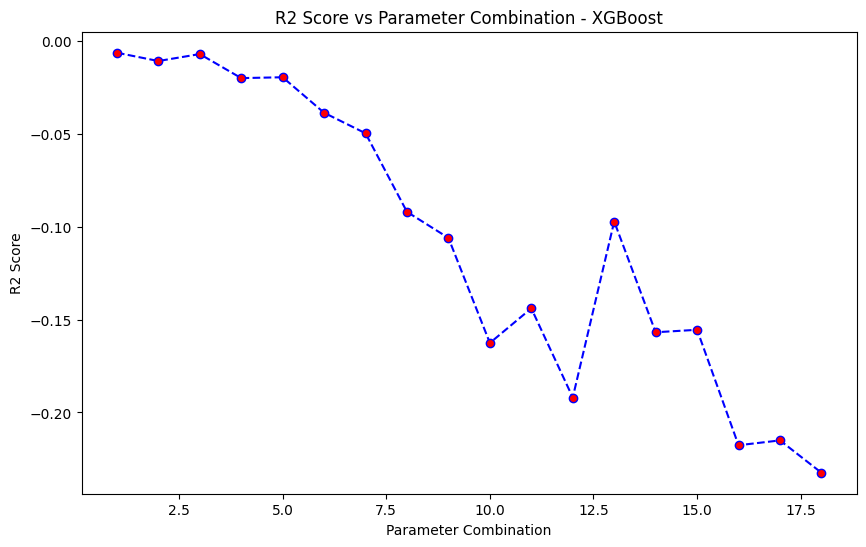

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [105]:
# Com todas as features
gs_xgb_original = grid_search_xgboost_reg(X_train_scaled, y_train)

# Você pode acessar os melhores parâmetros assim:
print(gs_xgb_original.best_params_)


Melhores Parâmetros XGBoost:
Melhor n_estimators: 100
Melhor learning_rate: 0.1
Melhor max_depth: 7
Melhor R2 score: 0.9623


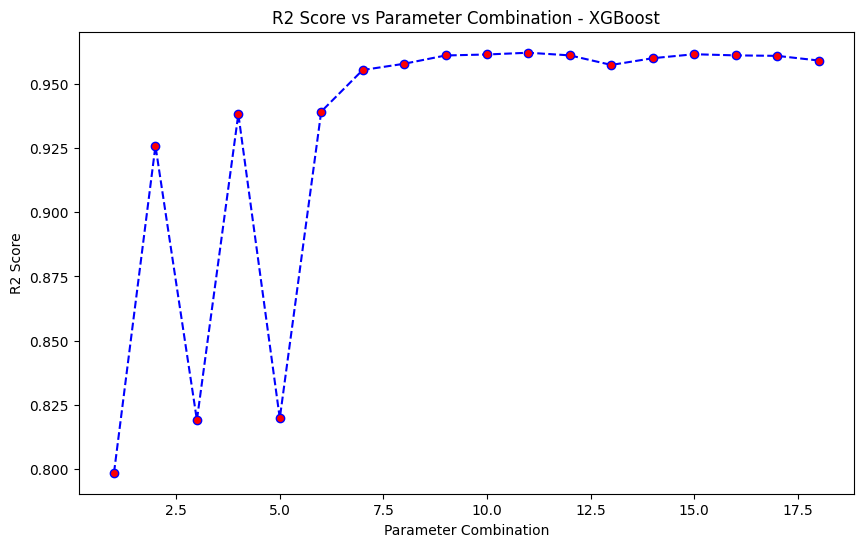

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [106]:
# Com as features selecionadas
gs_xgb_select = grid_search_xgboost_reg(X_train_selected, y_train)

# Você pode acessar os melhores parâmetros assim:
print(gs_xgb_select.best_params_)

In [107]:
rs_xgb_original = randomized_search_xgboost_reg(X_train, y_train)


Melhores Parâmetros XGBoost:
Melhor n_estimators: 200
Melhor learning_rate: 0.1
Melhor max_depth: 7
Melhor min_child_weight: 5
Melhor subsample: 0.6
Melhor colsample_bytree: 1.0
Melhor gamma: 0
Melhor reg_alpha: 0.1
Melhor reg_lambda: 2
Melhor R2 score: 0.9693


In [102]:
rs_xgb_select = randomized_search_xgboost_reg(X_train_selected, y_train)


Melhores Parâmetros XGBoost:
Melhor n_estimators: 100
Melhor learning_rate: 0.1
Melhor max_depth: 7
Melhor min_child_weight: 3
Melhor subsample: 1.0
Melhor colsample_bytree: 1.0
Melhor gamma: 0
Melhor reg_alpha: 0
Melhor reg_lambda: 1.5
Melhor R2 score: 0.9623


#### **Aplicando os melhores hiperparâmetros no algoritmo**

**Com todas as features**

In [115]:
# Com dados normalizados

# criando a instância do modelo
bst_scaled = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.01, objective='reg:squarederror')
# Ajustando o modelo
bst_scaled.fit(X_train_scaled, y_train)
# Predição
preds_scaled = bst_scaled.predict(X_test_scaled)

In [116]:
# Sem dados normalizados
# criando a instância do modelo
bst_no_scaled = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, min_child_weight=5, subsample=0.6, colsample_bytree=1.0, reg_alpha=0.1, reg_lambda=2, objective='reg:squarederror')
# Ajustando o modelo
bst_no_scaled.fit(X_train, y_train)
# Predição
preds_no_scaled = bst_no_scaled.predict(X_test)

**Com as features selecionadas**

In [125]:
# Com features selecionadas
# criando a instância do modelo Melhores Parâmetros XGBoost:

bst_select = XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, min_child_weight=3, subsample=1.0, colsample_bytree=1.0, reg_alpha=0, reg_lambda=1.5, objective='reg:squarederror')
# Ajustando o modelo
bst_select.fit(X_train_selected, y_train)
# Predição
preds_select = bst_select.predict(X_test_selected)

####Avaliação do XGBoost
Crie gráficos de linha para visualizar a performance do modelo.

##### Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

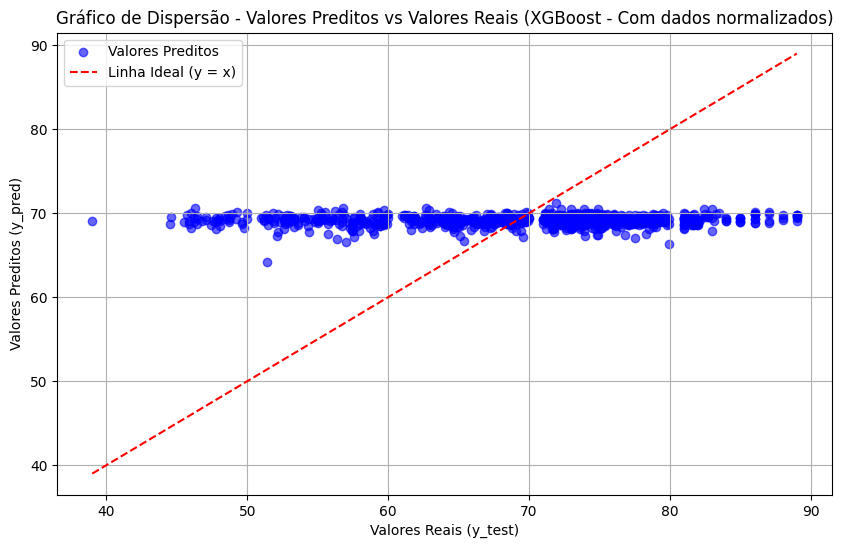

In [130]:
# # Com dados normalizados
grafico_valor_predito_x_real_completo(y_test, preds_scaled, 'XGBoost - Com dados normalizados')

#grafico_dispersao_ytest_vs_ypred(y_test, X_train_scaled, bst_scaled)

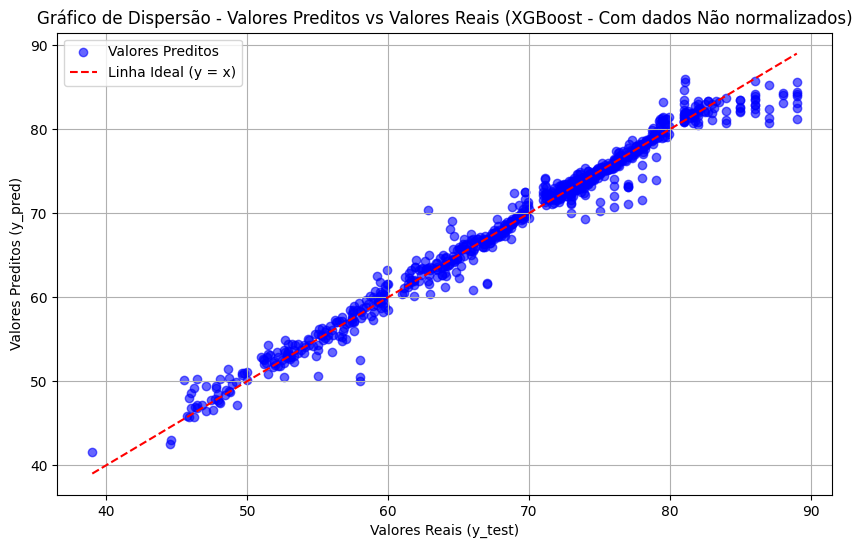

In [129]:
# Sem dados normalizados
grafico_valor_predito_x_real_completo(y_test, preds_no_scaled, 'XGBoost - Com dados Não normalizados')

#grafico_dispersao_ytest_vs_ypred(y_test, X_train, bst_no_scaled)

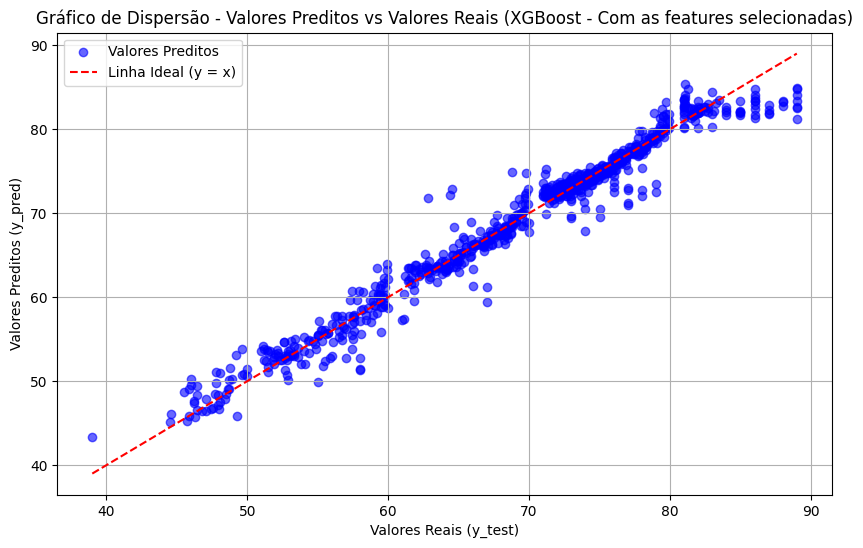

In [131]:
# Com as features selecionadas
grafico_valor_predito_x_real_completo(y_test, preds_select, 'XGBoost - Com as features selecionadas')

#grafico_dispersao_ytest_vs_ypred(y_test, X_train_selected, bst_select)

Para facilitar a visualização, faça um gráfico apenas dos 100 pontos.

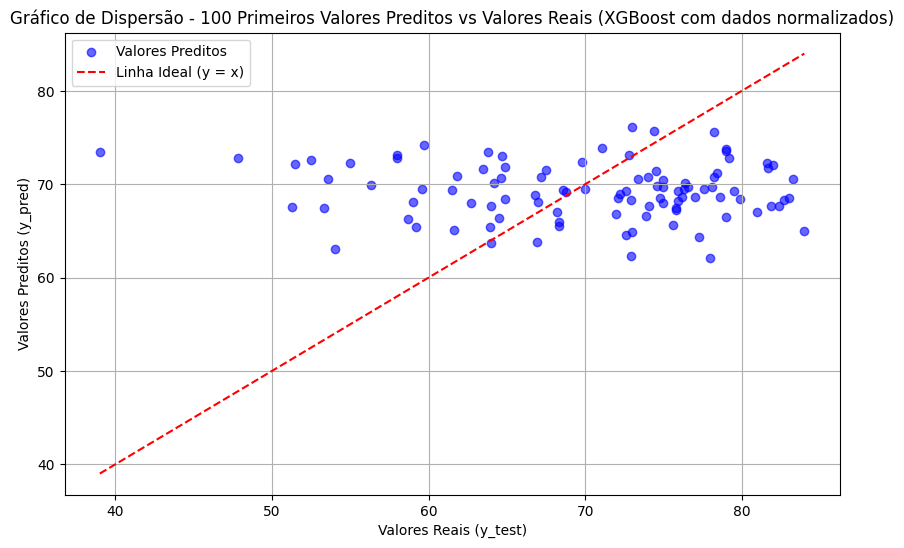

In [133]:
# Com dados normalizados
grafico_valor_predito_x_real_100(y_test, preds_scaled, 'XGBoost com dados normalizados')

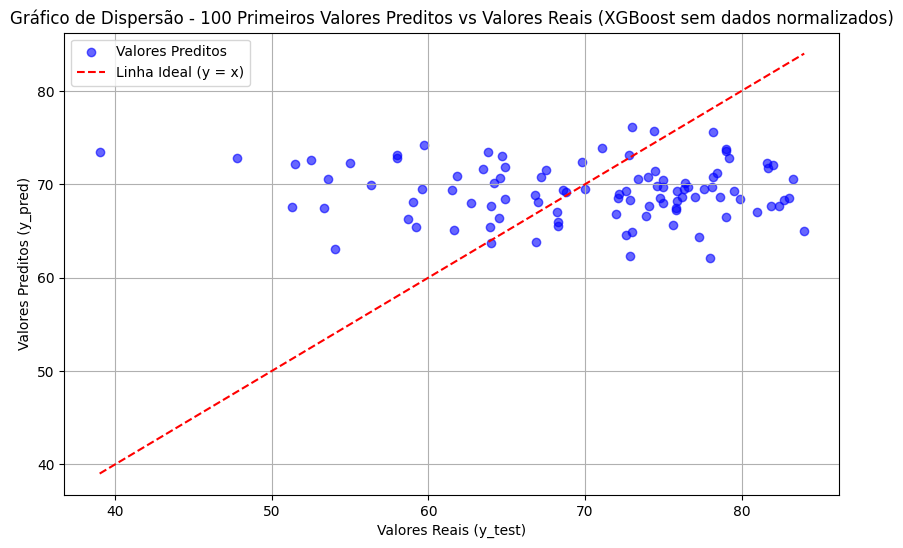

In [134]:
# Sem dados normalizados
grafico_valor_predito_x_real_100(y_test, preds_no_scaled, 'XGBoost sem dados normalizados')

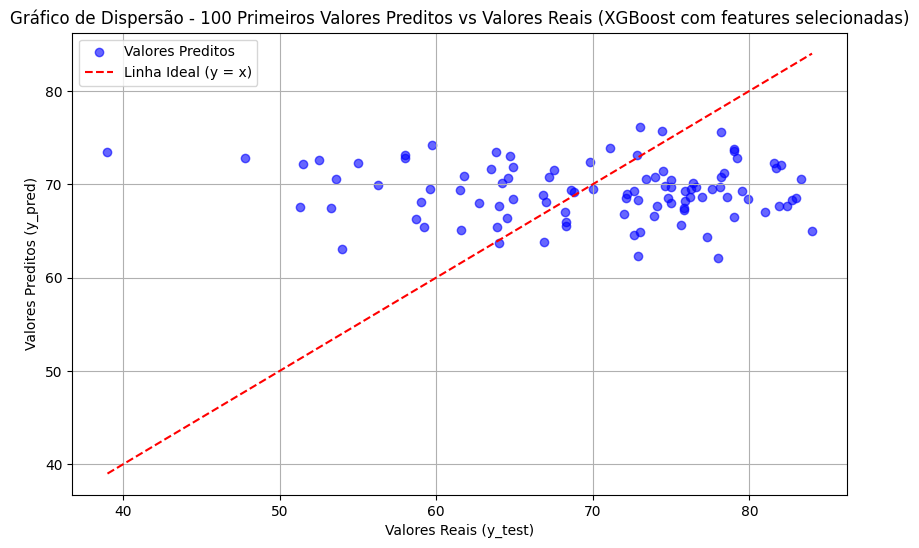

In [135]:
# Com as features selecionadas
grafico_valor_predito_x_real_100(y_test, preds_select, 'XGBoost com features selecionadas')

Agora, faça um gráfico exibindo o erro entre os pontos dos resíduos, i.e., valor real - valor predito.

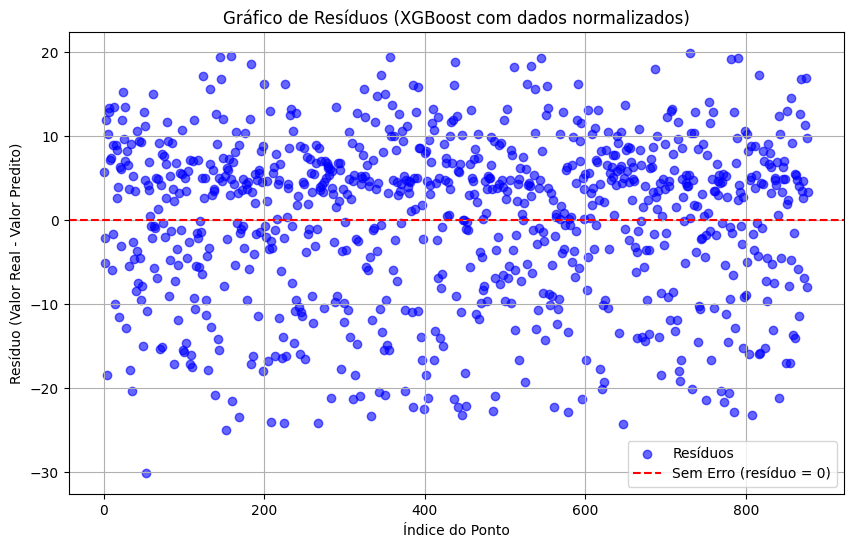

In [137]:
# Com dados normalizados
grafico_residuos(y_test, preds_scaled, 'XGBoost com dados normalizados')

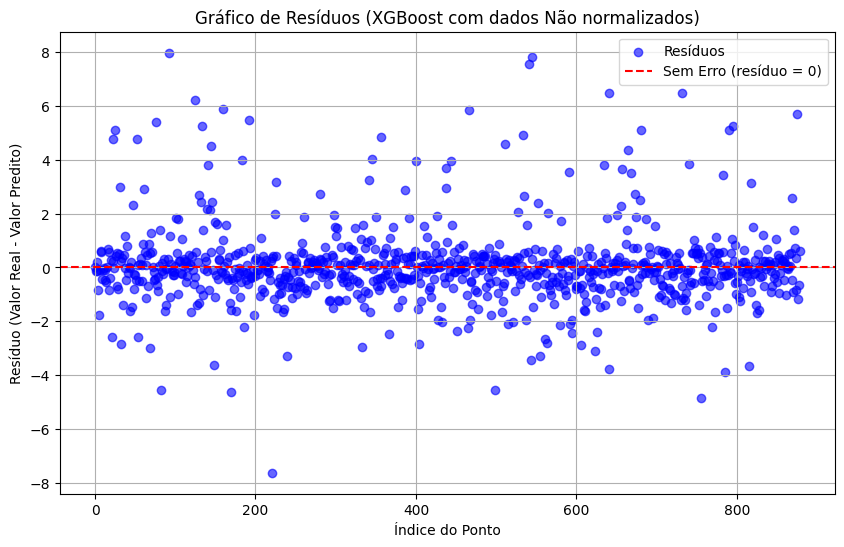

In [138]:
# Com dados Não normalizados
grafico_residuos(y_test, preds_no_scaled, 'XGBoost com dados Não normalizados')

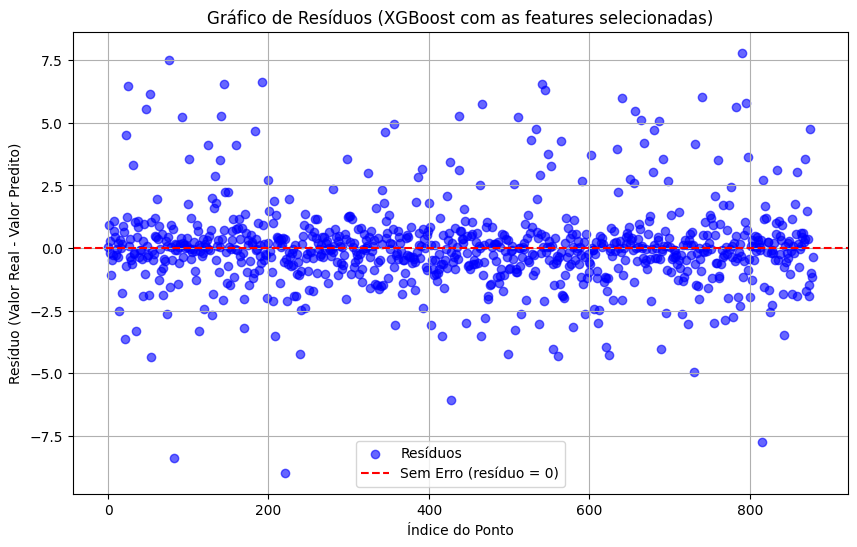

In [139]:
# Com as features selecionadas
grafico_residuos(y_test, preds_select, 'XGBoost com as features selecionadas')

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

**Resposta:** Sim, o desempenho dos modelos com as features e o com dados não normalizados foram bem razoáveis.

##### Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (MEAN, MAPE, MSE, RMSE e R²) e verifique se sua impressão visual se confirma.

In [140]:
# Com dados normalizados
print_metrics(y_test, preds_scaled)

MEAN:  7.949933630343319
MAPE:  0.1233902346195296
MSE:  94.17638291533868
RMSE:  8869.191099016494
R²:  0.0029402584065009174


In [141]:
# Com dados Não normalizados
print_metrics(y_test, preds_no_scaled)

MEAN:  0.8704369511349344
MAPE:  0.01283719664439084
MSE:  2.10651093917767
RMSE:  4.437388336875189
R²:  0.9776980471359951


In [142]:
# Com as features selecionadas
print_metrics(y_test, preds_select)

MEAN:  1.0701752533549198
MAPE:  0.01595685309936762
MSE:  2.9446074383013436
RMSE:  8.670712965699602
R²:  0.9688249915675106


**Comparação Geral:**

* **Com dados normalizados:**

- * *Desempenho muito ruim*. O modelo não foi capaz de capturar a relação entre as features e a variável alvo de maneira eficaz. Isso pode ter ocorrido porque o XGBoost (ou outros algoritmos baseados em árvores) não requer normalização e a normalização pode até prejudicar o desempenho desses algoritmos.

* **Com dados não normalizados:**

- * *Melhor desempenho geral*. O modelo consegue explicar cerca de 97.77% da variância dos dados, com erros relativamente baixos. Isso indica que o modelo está bem ajustado quando os dados são usados em sua escala original.

* **Com features selecionadas:**

- * *Bom desempenho*, mas inferior ao modelo com todos os dados não normalizados. A seleção de features pode ter removido variáveis que continham informações úteis, o que resultou em uma ligeira perda de precisão. No entanto, o desempenho ainda é muito bom, com um R² de 96.88%.

##### Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [145]:
# Validação cruzada com o modelo XGBoost regressor com dados normalizados

# Realizar a validação cruzada com 10 folds usando a métrica R2
# cv=10 especifica 10 folds, e scoring='r2' define a métrica a ser usada
r2_scores_bst_scaled = cross_val_score(bst_scaled, X_train_scaled, y_train, cv=10, scoring='r2')

# Exibir os resultados de cada fold
print(f"R2 scores para cada fold: {r2_scores_bst_scaled}")

# Exibir a média e o desvio padrão dos scores
print(f"Média do R2: {r2_scores_bst_scaled.mean():.4f}")
print(f"Desvio padrão do R2: {r2_scores_bst_scaled.std():.4f}")

R2 scores para cada fold: [-0.01589552 -0.01768806  0.00669828 -0.00392728 -0.01052721 -0.01243999
 -0.01605099 -0.00557409 -0.04210693 -0.01281587]
Média do R2: -0.0130
Desvio padrão do R2: 0.0119


In [146]:
# Validação cruzada com o modelo XGBoost regressor com dados Não normalizados

# Realizar a validação cruzada com 10 folds usando a métrica R2
# cv=10 especifica 10 folds, e scoring='r2' define a métrica a ser usada
r2_scores_bst_noscaled = cross_val_score(bst_no_scaled, X_train, y_train, cv=10, scoring='r2')

# Exibir os resultados de cada fold
print(f"R2 scores para cada fold: {r2_scores_bst_noscaled}")

# Exibir a média e o desvio padrão dos scores
print(f"Média do R2: {r2_scores_bst_noscaled.mean():.4f}")
print(f"Desvio padrão do R2: {r2_scores_bst_noscaled.std():.4f}")

R2 scores para cada fold: [0.96784128 0.97432514 0.95420792 0.97264988 0.98282777 0.97772408
 0.95946614 0.97043667 0.97474349 0.96471057]
Média do R2: 0.9699
Desvio padrão do R2: 0.0082


In [143]:
# Validação cruzada com o modelo XGBoost regressor as features selecionadas

# Realizar a validação cruzada com 10 folds usando a métrica R2
# cv=10 especifica 10 folds, e scoring='r2' define a métrica a ser usada
r2_scores_bst_select = cross_val_score(bst_select, X_train_selected, y_train, cv=10, scoring='r2')

# Exibir os resultados de cada fold
print(f"R2 scores para cada fold: {r2_scores_bst_select}")

# Exibir a média e o desvio padrão dos scores
print(f"Média do R2: {r2_scores_bst_select.mean():.4f}")
print(f"Desvio padrão do R2: {r2_scores_bst_select.std():.4f}")

R2 scores para cada fold: [0.97168786 0.97337228 0.93556983 0.96719578 0.97774067 0.96621669
 0.95712942 0.96281352 0.96403254 0.96535604]
Média do R2: 0.9641
Desvio padrão do R2: 0.0110


**Comparação Geral:**

1. Com Dados Normalizados:

- * O pior desempenho foi observado com dados normalizados, confirmando que a normalização não é adequada para o XGBoost. A normalização prejudicou o modelo, levando a um R² negativo e performance inferior ao modelo base.

2. Com Dados Não Normalizados:

- * Esta abordagem teve o melhor desempenho, com um R² médio de 0.9699 e baixa variação entre os folds (desvio padrão de 0.0082). O modelo foi robusto e consistente, sendo a melhor escolha para predição.

3. Com Features Selecionadas:

- * A seleção de features também resultou em um bom desempenho, embora ligeiramente inferior ao uso de todas as features não normalizadas. O R² médio de 0.9641 é um pouco menor, e o desvio padrão é ligeiramente maior (0.0110), sugerindo que a remoção de algumas features pode ter afetado um pouco a robustez do modelo.

**Conclusão:**

* **Melhor Desempenho:** O uso de dados não normalizados é a melhor abordagem. O XGBoost mostrou excelente desempenho com essa configuração, alcançando altos valores de R² e baixa variação entre os folds.

* **Normalização:** Deve ser evitada ao usar XGBoost, pois resultou em um desempenho muito ruim, conforme esperado para algoritmos baseados em árvores.

* **Seleção de Features:** Embora tenha apresentado bom desempenho, o modelo com todas as features não normalizadas foi mais preciso. A seleção de features pode ser usada para simplificar o modelo, mas com uma pequena perda de desempenho.

Portanto, como o objetivo é maximizar a precisão, o uso de dados não normalizados com todas as features será a abordagem preferida.

## Conclusão

**Conclusão Geral do Projeto de Regressão**

1. **Modelos Testados:**

- * Diversos algoritmos de regressão foram aplicados para prever a expectativa de vida com base em um conjunto de variáveis socioeconômicas e de saúde, como mortalidade infantil, gasto com saúde, vacinação, PIB, entre outras.
- * Os principais algoritmos utilizados foram *K-Nearest Neighbors* (K-NN), *Regressão Linear*, e *XGBoost*.

2. **Comparação de Desempenho:**

- * O modelo **K-NN Regressor** apresentou uma excelente performance, com valores de *R²* acima de 0.95 ao usar seleção de features. O K-NN capturou bem a variação dos dados com consistência, mostrando um ajuste adequado.

- * A **Regressão Linear*8 também teve um desempenho razoável, embora ligeiramente inferior ao K-NN. Com um *R²* médio de 0.9471, ela continua sendo uma escolha válida, principalmente pela simplicidade e interpretabilidade.

- * O **XGBoost** foi o modelo com melhor desempenho global. Em termos de variáveis não normalizadas, ele alcançou *R²* acima de 0.97, mostrando-se robusto e eficiente para capturar relações não lineares e interações complexas entre as variáveis.

3. **Impacto da Seleção de Features:**

- * A aplicação de técnicas de seleção de features melhorou o desempenho de todos os modelos, principalmente do K-NN e da Regressão Linear. Ao reduzir a quantidade de variáveis, os modelos se tornaram mais simples e eficientes, sem perder muita precisão.

- * Entretanto, o XGBoost apresentou uma leve perda de precisão ao usar seleção de features, sugerindo que, para esse algoritmo, manter todas as features pode ser a melhor opção.

4. **Impacto da Normalização:**

- * A normalização dos dados não foi necessária para o XGBoost, e, de fato, prejudicou o desempenho deste algoritmo. No entanto, foi benéfica para os modelos de K-NN e Regressão Linear, ambos mais sensíveis à escala dos dados.

5. **Imputação de Dados:**

- * O projeto envolveu uma comparação detalhada de diferentes métodos de imputação de dados faltantes (**KNN Imputer** e **Regressão Linear**). Observou-se que a imputação pelo método K-NN alterou significativamente as distribuições de variáveis como Adult Mortality, GDP e Schooling, impactando potencialmente a precisão dos modelos.

-* A imputação por Regressão Linear teve um impacto menor, mas ainda assim, variáveis importantes como Population e Hepatitis B foram afetadas.

6. **Gráficos e Visualizações:**

- * Foram gerados gráficos de regressão e resíduos para todos os modelos, fornecendo uma análise visual complementar à avaliação por métricas. As visualizações confirmaram que os modelos com features selecionadas performaram de maneira mais eficiente.

**Conclusão Final**

O projeto demonstrou que o uso de técnicas avançadas como XGBoost, aliado à seleção de features, pode resultar em modelos altamente precisos para problemas de regressão complexos, como a predição da expectativa de vida. No entanto, é crucial escolher o método de imputação de dados faltantes com cautela, pois ele pode alterar significativamente a distribuição dos dados e, consequentemente, impactar a performance dos modelos.

Além disso, a normalização dos dados deve ser utilizada com discrição, uma vez que algoritmos como XGBoost não requerem esse processo e podem até ter seu desempenho comprometido quando aplicada.

Em resumo, o **XGBoost com todas as features não normalizadas** se mostrou a melhor escolha para maximizar a precisão do modelo.